# **Asignatura**: Aprendizaje Automático

**Práctica 1**: Aprendizaje supervisado.

**Valoración máxima**: 10 puntos

**Fecha límite de entrega**: 28 de Marzo de 2025 a las 23:59

**Procedimiento de entrega**: a través de PRADO

### Nombre completo: <mark>Jaime Corzo Galdó</mark>






**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`). **No es necesario entregar ninguna memoria externa** (por ejemplo, en `.pdf`).

- El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. **Sin esta documentación, se considera que el trabajo NO ha sido presentado**.

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código **NO debe escribir nada a disco**.

- El **path de lectura desde Google Drive debe ser siempre el mismo**, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


# **Ejercicio 1: Problema de clasificación (5 puntos)**

En este ejercicio los alumnos se enfrentarán a un problema de clasificación, que tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). En particular, se enfrentarán a un problema real de uso de técnicas de aprendizaje automático para desarrollar sistemas olfativos de Inteligencia Artificial mediante **narices electrónicas (*e-Nose*)**, capaces de determinar la calidad de una muestra de carne en base a los gases emitidos por la misma. El conjunto de datos se obteniene a partir de la investigación realizada en el siguiente artículo:

- Feyzioglu, A.; Taspinar, Y.S. Beef Quality Classification with Reduced E-Nose Data Features According to Beef Cut Types. Sensors 2023, 23, 2222 (URL: <a href="https://www.mdpi.com/1424-8220/23/4/2222">https://www.mdpi.com/1424-8220/23/4/2222</a>)



## Contexto y motivación del problema

Los controles de calidad alimentarios son un conjunto de procedimientos y normativas que se implementan para asegurar que los alimentos sean seguros, saludables y cumplan con los estándares establecidos. Esto incluye la supervisión de la producción, el procesamiento, el almacenamiento y la distribución de los alimentos.

Los controles de calidad pueden abarcar desde la inspección de las materias primas hasta la evaluación del producto final, asegurando que no haya contaminantes y que se mantengan las propiedades nutricionales. Normalmente, el proceso de control de calidad conlleva la toma de muestras de alimentos, su transporte a un laboratorio, la realización de diferentes análisis químicos sobre el alimento y la generación de informes positivos o negativos.

Como alternativa a este proceso, **en esta práctica pretendemos elaborar un modelo de aprendizaje automático** capaz de ser integrado en **sistemas olfativos electrónicos (*e-Noses*)** sensibles a los gases que pueden generar diferentes alimentos frescos o en descomposición. En particular, **nos crentraremos en la clasificación de la calidad de cortes de carne** haciendo uso de diferentes gases generados durante el proceso de descomposición de la misma.

Una **e-Nose** (*nariz electrónica*) es un dispositivo diseñado para detectar y analizar olores de manera similar a como lo hace el sentido del olfato en los seres humanos. Utilizan sensores químicos que pueden identificar diferentes compuestos volátiles en el aire (gases).

Estos dispositivos son muy útiles en diversas aplicaciones, como en la industria alimentaria para controlar la calidad de los productos, en la detección de contaminantes en el medio ambiente, o incluso en la medicina para identificar enfermedades a través del análisis de olores específicos.

La tecnología detrás de las narices electrónicas puede variar. En general, combinan sensores, algoritmos de procesamiento de datos y aprendizaje automático para interpretar los olores y proporcionar información útil.

<center>
<img src="https://cdn.open-pr.com/V/5/V505414311_g.jpg" />
</center>

## El conjunto de datos

El conjunto de datos original se encuentra disponible con acceso público en el enlace <a href="https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/XNFVTS">https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/XNFVTS</a>.


Se trata de un conjunto de datos que contiene 12 tipos de cortes de carne diferentes (redondo, solomillo superior, filete de lomo, carne de aleta, lomo corto, falda, terrón, carne de falta, interior/exterior, costillas, espinilla y grasa). Los cortes fueron monitorizados durante 37h hasta su deterioro utilizando 11 tipos de sensores de gas distintos. En cada medición, se asignó una categoría del estado de la carne con 4 etiquetas indicando la calidad "excelente", "buena", "aceptable" y "estropeada".


El **objetivo de la práctica** es desarrollar un modelo de aprendizaje automático capaz de clasificar el estado de una muestra de carne, independientemente de su tipo de corte, partiendo de los datos proporcionados por cada uno de los sensores. El modelo de decisión para determinar el estado de la carne a partir de los datos de los sensores necesita ser entrenado previamente para tener un desempeño correcto. El conjunto de datos a utilizar ha sido preprocesado y extraído a partir de los datos originales, y tiene el siguiente formato:

- **Datos de entrada (X)**: Valor de medición de cada tipo de sensor de gas (en total 11 tipos distintos).
- **Datos de salida (Y)**: Clasificación del tipo de carne.


El conjunto de datos a usar en la práctica se encuentra accesible desde el enlace mostrado en la siguiente celda de código, el cual deberá ser usado por el estudiante para elaborar la práctica.

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path_to_data_classification= 'https://www.dropbox.com/scl/fi/3zmizfgjfz5xbbr7xcn2x/MeatClassification.csv?rlkey=81gz5xipne04whrniwqc40r21&st=7o73a6qs&dl=1'

df= pd.read_csv(path_to_data_classification)
df.head(5)


,MQ135,MQ136,MQ137,MQ138,MQ2,MQ3,MQ4,MQ5,MQ6,MQ8,MQ9,Cut,Label
0,16.28,8.01,11.67,13.49,7.09,18.20,7.68,10.39,14.63,34.71,10.53,Striploin,Excellent
1,11.89,8.01,18.43,12.59,7.09,15.08,4.84,19.02,15.35,41.58,11.21,Shin,Spoiled
2,12.87,6.77,22.40,12.05,6.86,16.04,4.60,20.33,18.25,34.51,11.30,Inside-Outside,Spoiled
3,9.78,4.41,12.88,11.35,7.11,13.14,4.76,14.63,19.61,25.20,14.23,Brisket,Acceptable
4,16.42,10.14,13.30,18.36,8.92,27.75,7.62,12.06,16.72,44.07,14.70,Fat,Excellent


El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):

1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un $ensemble$.
5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar).
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.

## **1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición**

Se trata de un problema de Aprendizaje Supervisado. En este caso nos enfrentamos a una tarea de clasificación del estado de una muestra de carne, independientemente de su tipo de corte(hay 12). Se entrena con
muchos cortes de carne de ejemplo junto con su clase
( "excelente", "buena", "aceptable" y "estropeada"), y debe aprender a clasificar los nuevos cortes de carne.

Para identificar el estado del corte de carne disponemos de 11 sensores, que serían las características(variable independiente X) y queremos obtener el estado de una muestra de carne que sería la variable objetivo(variable dependiente Y).

Para hacernos una idea de como es el dataset, vamos a ver cuantos patrones tiene y para que resulte mas facil tratar los datos, vamos a codificar la columna de Label con un mapeo para pasar los datos de categóricos a ordinales. Luego según los modelos que escojamos mantendremos esta decisión o no.

Realmente esto forma parte de la codificación de datos, ya que los métodos de aprendizaje automático suelen trabajar sobre datos numéricos.

Además como queremos clasificar el estado de una muestra de carne, independientemente de su tipo de corte, la columna de "Cut" no es necesaria, asi que no vamos a trabajar con ella.

Antes vamos a mostrar la matriz de correlación entre los sensores. Una matriz de correlación es una tabla que muestra los coeficientes de correlación entre múltiples variables. Cada celda de la tabla representa la correlación entre dos variables, permitiendo una evaluación visual rápida de las relaciones entre ellas.
 Los valores de una matriz de correlación suelen oscilar entre -1 y 1, donde -1 indica una correlación negativa perfecta, 1 indica una correlación positiva perfecta y 0 indica que no hay correlación.

En este caso nos muestra que algunos sensores tienen una relación moderada o alta entre sí. Esto podría indicar redundancia en los datos y sugiere que podríamos aplicar técnicas de reducción de dimensionalidad, como PCA, para mejorar el modelo.

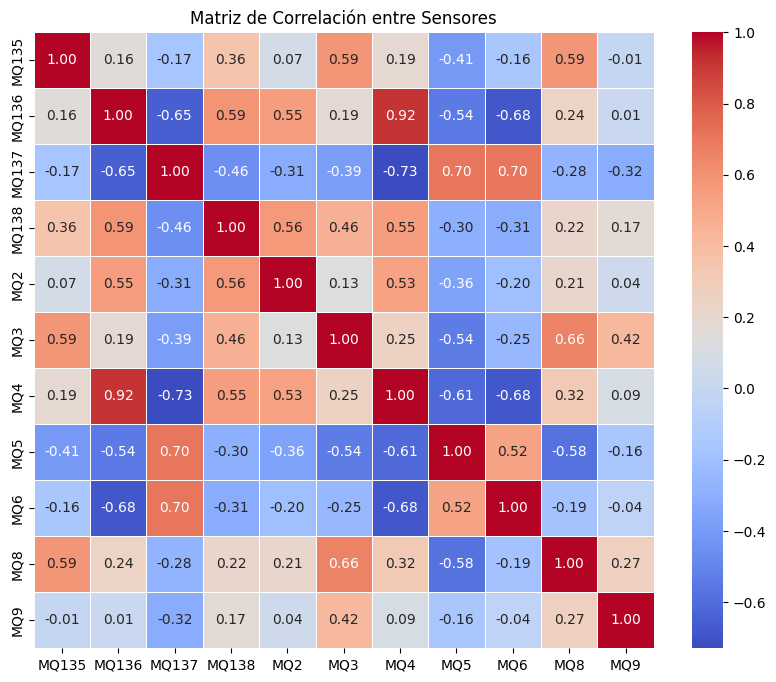

In [154]:
import seaborn as sns

# Matriz de correlación entre los sensores
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(columns=["Cut", "Label"]).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Sensores")
plt.show()

In [155]:
# Definir un diccionario con el orden correcto, con LabelEncoder se toman en orden alfabetico
label_mapping = {'Excellent': 3, 'Good': 2, 'Acceptable': 1, 'Spoiled': 0}

# Aplicar el mapeo a la columna 'Label'
df['Label_encoded'] = df['Label'].map(label_mapping)

# Verificar la conversión
print(df[['Label', 'Label_encoded']].head(10))

data= df[['MQ135',	'MQ136',	'MQ137',	'MQ138',	'MQ2',	'MQ3',	'MQ4',	'MQ5',	'MQ6',	'MQ8',	'MQ9', 'Label_encoded']].to_numpy()

X= data[:, :-1].astype(float) #Selecciona todas las filas (:) y todas las columnas excepto la última (:-1). Es decir, está extrayendo las características (variables independientes).
y= data[:, -1].astype(int) #Selecciona todas las filas (:) y solo la última columna (-1). Esto significa que extrae la variable objetivo o etiqueta (variable dependiente).

print('Conjunto de datos con {} patrones y {} atributos. Tiene {} clases.'.format(X.shape[0], X.shape[1], len(np.unique(y))))

        Label  Label_encoded
0   Excellent              3
1     Spoiled              0
2     Spoiled              0
3  Acceptable              1
4   Excellent              3
5   Excellent              3
6     Spoiled              0
7        Good              2
8  Acceptable              1
9        Good              2
Conjunto de datos con 2400 patrones y 11 atributos. Tiene 4 clases.


Ahora vamos a generar un diagrama de cajas y bigotes para cada sensor de gas en el dataset. Recordemos que la caja central abarca desde el percentil 25 (Q1) hasta el percentil 75 (Q3).
La línea dentro de la caja indica la Mediana - Q2.
Los bigotes muestran los valores dentro de 1.5 veces el IQR.
Por último los puntos fuera de los bigotes son valores atípicos.

En la gráfica resultante podemos ver que casi todos los sensores tienen valores atípicos. Además algunos sensores como MQ6 y MQ8 tienen una distribución más dispersa.

Esto nos puede servir para el procesado de datos extremos/atípicos. En este caso vemos que sería bueno realizarlo para evitar que los algoritmos se vean afectados por valores extremos.

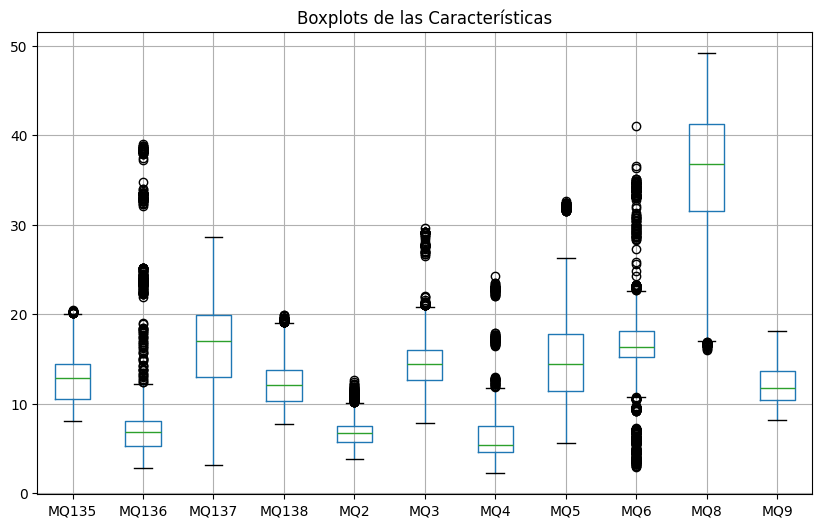

In [156]:
# Crear boxplots para cada columna numérica
plt.figure(figsize=(10, 6))
df.boxplot(column=['MQ135',	'MQ136',	'MQ137',	'MQ138',	'MQ2',	'MQ3',	'MQ4',	'MQ5',	'MQ6',	'MQ8',	'MQ9'])
plt.title("Boxplots de las Características")
plt.show()

Para tener más claro como están distribuidos los valores de los sensores vamos a crear un histograma para cada uno de ellos. Un histograma es una representación gráfica de la distribución de un conjunto de datos. Muestra cómo se distribuyen los valores de una variable(en el eje X) y proporciona una visión rápida de la frecuencia con la que ocurren ciertos rangos de valores dentro del conjunto de datos(eje Y).

Vemos que tenemos distintos tipos de distribuciones, distribuciones más simétrica como el MQ6, distribuciones sesgadas, como el MQ136 o el MQ4(sesgada a la izquierda)... Por lo que puede ser interesante normalizar los datos.

LAs tendencias nos ayudan a confirmar que es importante el procesado de datos atípicos, el MQ136 es un claro ejemplo de ello, ya que tenemos la mayoria de los datos concentrados en una zona(la izquierda) y por otro lado valores sueltos con poca frecuencia.

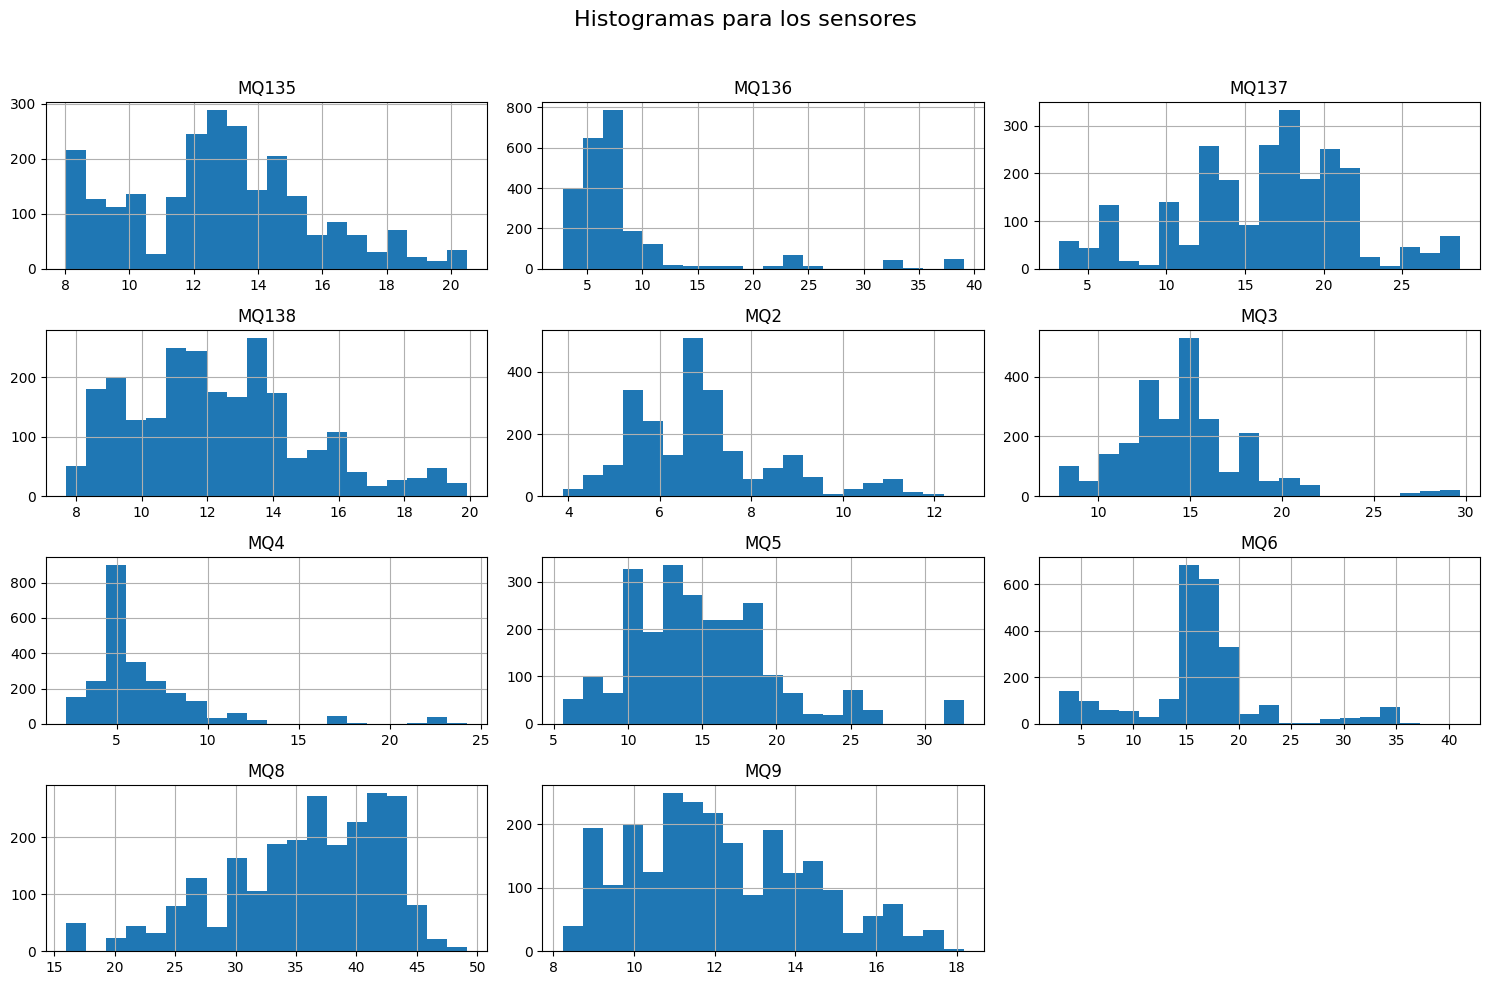

In [157]:
df[['MQ135',	'MQ136',	'MQ137',	'MQ138',	'MQ2',	'MQ3',	'MQ4',	'MQ5',	'MQ6',	'MQ8',	'MQ9']].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogramas para los sensores', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

También vamos a comprobar si hay datos nulos, ya que de haberlos es importante quitarlos o sustituirlos por otros valores aproximados. Un valor perdido es un valor desconocido dentro de una celda en nuestro conjunto de datos y en NumPy se suelen representar mediante el valor np.nan. Existen varias técnicas de tratamiento de valores perdidos pero en este dataset podemos comprobar que no hay valores nulos.


In [158]:
#Comprobamos si hay valores nulos. Dos opciones
print('El numero de valores nulos es: \n{}\n'.format(df.isnull().sum()))
print(df.info())

El numero de valores nulos es: 
MQ135            0
MQ136            0
MQ137            0
MQ138            0
MQ2              0
MQ3              0
MQ4              0
MQ5              0
MQ6              0
MQ8              0
MQ9              0
Cut              0
Label            0
Label_encoded    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MQ135          2400 non-null   float64
 1   MQ136          2400 non-null   float64
 2   MQ137          2400 non-null   float64
 3   MQ138          2400 non-null   float64
 4   MQ2            2400 non-null   float64
 5   MQ3            2400 non-null   float64
 6   MQ4            2400 non-null   float64
 7   MQ5            2400 non-null   float64
 8   MQ6            2400 non-null   float64
 9   MQ8            2400 non-null   float64
 10  MQ9            2400 non-null   float64
 11  Cut 

Importante también comprobar que la variable objetivo("Label"), no esté desbalanceada, ya que si algunas categorías tienen muchas más muestras que otras, el modelo podría sesgarse hacia la clase mayoritaria. En este caso, cada categoría ("Excellent", "Good", "Acceptable", "Spoiled") tiene 600 muestras, por lo que no es necesario aplicar técnicas de balanceo.

In [159]:
#Comprobamos si la variable objetivo esta balanceada
excellent = y==3
print('El numero de Excellent es: {}\n'.format(np.sum(excellent)))
good = y==2
print('El numero de Good es: {}\n'.format(np.sum(good)))
acceptable = y==1
print('El numero de Acceptable es: {}\n'.format(np.sum(acceptable)))
spoiled = y==0
print('El numero de Spoiled es: {}\n'.format(np.sum(spoiled)))

El numero de Excellent es: 600

El numero de Good es: 600

El numero de Acceptable es: 600

El numero de Spoiled es: 600



## **2.Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.**

Vamos a dividir los datos de la siguiente forma:

-> Entrenamiento (70%): Para ajustar los modelos

-> Validación (15%): Para la selección de hiperparámetros y evitar sobreajuste.

-> Test (15%): Para evaluar el rendimiento final del modelo en datos no vistos.

Vamos a hacer esta división de manera estratificada, asegurándonos de que todas las clases de la variable objetivo estén representadas proporcionalmente en cada conjunto.

Vamos a usar train_test_split dos veces, durante el procesamiento, y en general antes de llegar al partado final de entrenamiento y estimación del error fuera de la muestra vamos a trabajar con:

-> Entrenamiento(85%)

-> Test(15%)

Luego separaremos el 15% del entrenamiento para la validación, de tal manera que nos quede 70% entrenamiento, 15% validación y 15% test. El procesamiento lo vamos a realizar sobre el conjunto de training y test por separado para evitar el DATA SNOOPING.

In [160]:
from sklearn.model_selection import train_test_split

#con random_state fijamos la semilla
Xtrain, Xtest, Ytrain, Ytest= train_test_split(X, y, test_size= 0.15, random_state= 123, stratify=y)
#Xval, Xtest, Yval, Ytest = train_test_split(Xtemp, Ytemp, test_size=0.50, random_state=123, stratify=Ytemp)

Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((2040, 11), (360, 11), (2040,), (360,))

Como estamos ante un problema de clasificación, vamos a usar las siguiente métricas:

-> metrics.accuracy_score: Tasa de aciertos total, calculada como
Acc = (TP+TN)/(TP+TN+FP+FN)

-> metrics.precision_score: Tasa de aciertos entre los predichos como positivos,
calculada como Precision = TP/(TP+FP)

-> metrics.recall_score: Tasa de aciertos entre los reales positivos, calculada como Recall = TP/(TP+FN)

-> metrics.f1_score: Métrica que agrupa la precisión y el recall. Calculada como: F1 = 2*(Precision·Recall)/(Precision + Recall) = 2TP/(2TP + FP + FN)

donde:
* TP (True Positives). Elementos de la clase objetivo (1) que han
sido bien clasificados.
* FP (False Positives). Elementos de la clase alternativa (0) que han
sido clasificados en la clase objetivo (1).
* TN (True Negatives). Elementos de la clase alternativa (0) que han
sido bien clasificados.
* FN (False Negatives). Elementos de la clase objetivo (1) que han
sido clasificados en la clase alternativa (0).

MATRIZ DE CONFUSIÓN: Es una herramienta que permite visualizar el desempeño de un algoritmo de aprendizaje supervisado. Cada columna representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real.
En la diagonal siempre van a estar los resultados correctos.

In [161]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## **3.Preprocesado de datos**

Vamos a empezar realizando el procesado de datos atípicos. Para conservar la mayor cantidad de datos posible vamos a sustituir los valores fuera del rango por la mediana de cada columna. Por ello preferimos esta opción a eliminar los valores atípicos. Vamos a hacerlo por separado tanto para el conjunto de training como para el conunto de test.

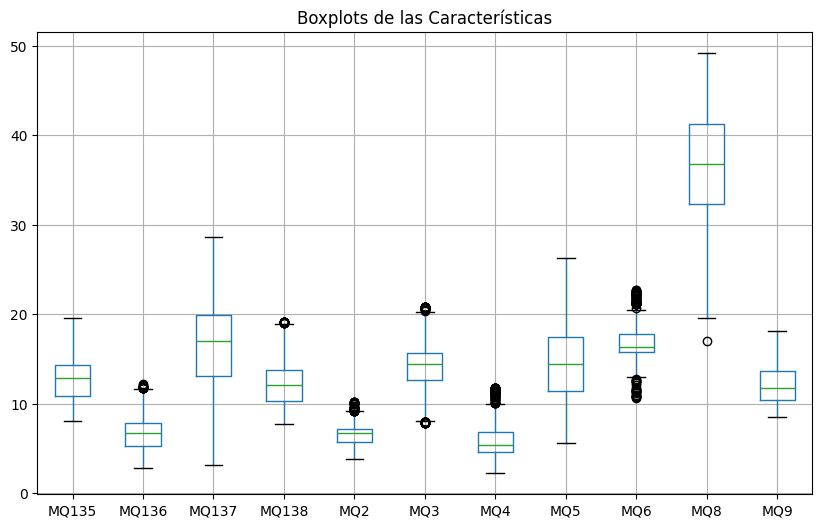

In [162]:
# 1. Calcular cuartiles (Q1 y Q3)
Q1 = np.percentile(Xtrain, 25, axis=0)  # Percentil 25 (Q1)
Q3 = np.percentile(Xtrain, 75, axis=0)  # Percentil 75 (Q3)
IQR = Q3 - Q1  # Rango intercuartílico

# 2. Definir límites para valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

X_cleaned_training = np.where((Xtrain <= lower_bound) | (Xtrain >= upper_bound), np.median(Xtrain, axis=0), Xtrain)
plt.figure(figsize=(10, 6))
df_cleaned = pd.DataFrame(X_cleaned_training, columns=['MQ135',	'MQ136',	'MQ137',	'MQ138',	'MQ2',	'MQ3',	'MQ4',	'MQ5',	'MQ6',	'MQ8',	'MQ9'])
df_cleaned.boxplot(column=['MQ135',	'MQ136',	'MQ137',	'MQ138',	'MQ2',	'MQ3',	'MQ4',	'MQ5',	'MQ6',	'MQ8',	'MQ9'])
plt.title("Boxplots de las Características")
plt.show()


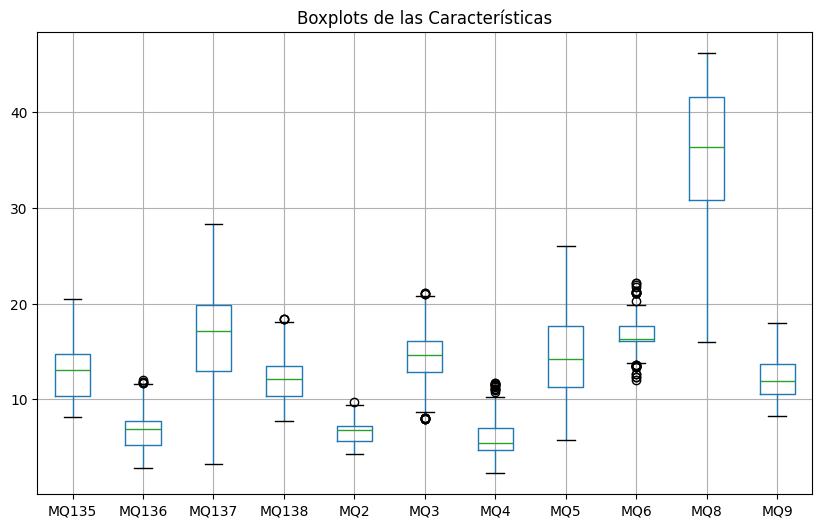

In [163]:
# 1. Calcular cuartiles (Q1 y Q3)
Q1 = np.percentile(Xtest, 25, axis=0)  # Percentil 25 (Q1)
Q3 = np.percentile(Xtest, 75, axis=0)  # Percentil 75 (Q3)
IQR = Q3 - Q1  # Rango intercuartílico

# 2. Definir límites para valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

X_cleaned_test = np.where((Xtest <= lower_bound) | (Xtest >= upper_bound), np.median(Xtest, axis=0), Xtest)
plt.figure(figsize=(10, 6))
df_cleaned = pd.DataFrame(X_cleaned_test, columns=['MQ135',	'MQ136',	'MQ137',	'MQ138',	'MQ2',	'MQ3',	'MQ4',	'MQ5',	'MQ6',	'MQ8',	'MQ9'])
df_cleaned.boxplot(column=['MQ135',	'MQ136',	'MQ137',	'MQ138',	'MQ2',	'MQ3',	'MQ4',	'MQ5',	'MQ6',	'MQ8',	'MQ9'])
plt.title("Boxplots de las Características")
plt.show()

Como los sensores tienen valores en diferentes escalas, vamos a aplicar StandardScaler para normalizarlos. StandardScaler es un método de transformaciones de datos. Lo que hace es esttandarizarlos centrándolos en el 0 y modificando su varianza a 1. Se efectúa con sklearn.preprocessing.StandardScaler.

Lo hacemos por separado para los datos del training y del test, la diferencia que para el test no usamos fit, ya que no queremos que nos ajuste estos datos, esta metodología la vamos a repetir a lo largo del preprocesamiento

In [164]:
from sklearn.preprocessing import StandardScaler

se= StandardScaler()
se.fit(X_cleaned_training)
X_std_training= se.transform(X_cleaned_training)
print('Los valores originales del training\n{}\nse han estandarizado con media 0 y std 1:\n{}'.format(X_cleaned_training, X_std_training))

X_std_test= se.transform(X_cleaned_test)
print('\nLos valores originales del test\n{}\nse han estandarizado con media 0 y std 1:\n{}'.format(X_cleaned_test, X_std_test))

Los valores originales del training
[[ 9.44  6.11 13.85 ... 17.1  38.12 10.29]
 [18.55  6.97 18.11 ... 22.22 43.22 12.52]
 [16.35  8.01 11.58 ... 14.7  36.57 10.49]
 ...
 [15.31  6.69 19.93 ... 17.1  40.29 16.91]
 [10.53  4.15 21.89 ... 16.12 26.2   8.9 ]
 [12.08  6.91 17.36 ... 15.77 40.29 11.52]]
se han estandarizado con media 0 y std 1:
[[-1.25114189 -0.24575767 -0.42440324 ...  0.21893339  0.31668839
  -0.83925531]
 [ 2.22258247  0.21291538  0.35535848 ...  3.29214525  1.14977965
   0.19274595]
 [ 1.38370282  0.76758978 -0.83991007 ... -1.22163467  0.06349398
  -0.74669914]
 ...
 [ 0.98714153  0.06357997  0.68849611 ...  0.21893339  0.67116055
   2.22435381]
 [-0.83551516 -1.29110556  1.04725972 ... -0.36929857 -1.63045825
  -1.48252067]
 [-0.24448631  0.18091494  0.21807648 ... -0.57938141  0.67116055
  -0.27003488]]

Los valores originales del test
[[17.26  7.46 19.93 ... 17.58 36.14 11.17]
 [11.94  6.83  4.6  ... 16.27 33.74 13.45]
 [ 8.94  4.39 10.1  ... 18.96 27.27 14.58]
 ...

Ahora vamos a pasar a la fase de extracción y selección de carasterísticas. Esto es importante para:
1. Averiguar cuáles son los atributos que permiten predecir el resultado correcto con máxima precisión.
2. Reducir la complejidad del modelo resultante.

Primero vamos a comenzar con la extracción de características. Esta trata de combinar dos o más atributos (columnas) existentes para dar lugar a un nuevo atributo que agregue la información de ambos de forma más compacta. Para ello vamos a usar el análisis de componentes principales (PCA). Ya vimos que hay algunos sensores que tienen una relación moderada o alta entre si así que de esta manera reducimos la redundancia.

Este método realiza una reducción lineal de la dimensionalidad mediante Singular Value Decomposition de los datos para proyectarlos a un espacio de menor dimensión. Los datos de entrada se centran pero no se escalan para cada característica antes de aplicar la SVD.

Entre sus parámetros más importante tenemos:

-> n_components: int en general, es el número de componentes que se mantienen, si no se indica nada se mantienen todas las componentes

Luego llamamos a fit para ajustar el modelo con el X que le pasemos, en este caso X_std(resultado del procesado de datos atípicos y StandarScaler).

In [165]:
# Tratamos de reducir las características de los atributos
from sklearn.decomposition import PCA

pca= PCA(n_components=11) # Iniciamos PCA con 11 componentes, dado que tenemos 11 atributos
pca.fit(X_std_training)

print('Componentes obtenidas (de mayor a menor importancia): \n{}'.format(pca.components_))
print('Varianza explicada: \n{}'.format(pca.explained_variance_))
print('Porcentaje de varianza explicada de cada componentes: \n{}'.format(pca.explained_variance_/np.sum(pca.explained_variance_)))

Componentes obtenidas (de mayor a menor importancia): 
[[ 0.27845127  0.38787308 -0.35075827  0.29931806  0.29338532  0.34038163
   0.3352305  -0.34330453 -0.11371362  0.28497185  0.18189249]
 [ 0.42517899  0.01373211  0.18943768 -0.30127302 -0.33226406  0.35797143
  -0.21895334 -0.04594381  0.48448639  0.41049623  0.02352922]
 [-0.39778208 -0.27795813 -0.35641775 -0.3309131  -0.00225775  0.10104539
   0.14899034 -0.20811274  0.32531417 -0.10795666  0.57858737]
 [-0.09452808  0.09716568  0.33042486  0.16543337  0.33148027  0.15409551
  -0.30763657  0.47080806 -0.10469344  0.17561343  0.59443133]
 [ 0.24032618  0.21513061  0.11950696  0.06209353  0.35573339 -0.10378724
   0.2697966   0.21894262  0.6341003  -0.4651258  -0.03681464]
 [ 0.0407568   0.31481309  0.11802527 -0.48899415 -0.27289085  0.22214368
   0.4952237   0.34016903 -0.35275066 -0.16755649  0.09433686]
 [-0.16119546  0.08919433  0.23543258 -0.53377014  0.5622562  -0.2616349
   0.09353873 -0.18842399 -0.01167124  0.40036394 

Resulta que una componente es capacez de explicar el 40,45\% del total de la varianza del conjunto de datos. Y si quitamos la última seguimos siendo capaces de explicar el 98,56\% del total de la varianza del conjunto de datos.
Nos basta con diez componentes que hagan los cálculos para obtener casi un 100\% de aciertos en la predicción.

In [166]:
# Rehacemos PCA con 10 componentes
pca= PCA(n_components=10) # Iniciamos PCA con 10 componentes
pca.fit(X_std_training)
print('Componentes obtenidas (de mayor a menor importancia): \n{}'.format(pca.components_))
print('Varianza explicada: \n{}'.format(pca.explained_variance_))

print('Transformación de datos iniciales X de training de tamaño {} a X_pca:'.format(X_std_training.shape))
X_pca_training= pca.transform(X_std_training)
print('Datos transformados de tamaño {}:\n{}'.format(X_pca_training.shape, X_pca_training))

# Predicción de y a partir de X_pca usando SVC.
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_pca_training, Ytrain)
y_pred= svc.predict(X_pca_training)

# Resultados
print('Los datos originales de salida eran: {}'.format(Ytrain))
print('Los datos predichos de salida son: {}'.format(y_pred))
aciertos= 100*np.sum( Ytrain==y_pred )/len(y_pred)
print('Tengo una tasa de aciertos del {}\%'.format(aciertos))

print('\nTransformación de datos iniciales X de test de tamaño {} a X_pca:'.format(X_std_test.shape))
X_pca_test= pca.transform(X_std_test)
print('Datos transformados de tamaño {}:\n{}'.format(X_pca_test.shape, X_pca_test))

Componentes obtenidas (de mayor a menor importancia): 
[[ 0.27845127  0.38787308 -0.35075827  0.29931806  0.29338532  0.34038163
   0.3352305  -0.34330453 -0.11371362  0.28497185  0.18189249]
 [ 0.42517899  0.01373211  0.18943768 -0.30127302 -0.33226406  0.35797143
  -0.21895334 -0.04594381  0.48448639  0.41049623  0.02352922]
 [-0.39778208 -0.27795813 -0.35641775 -0.3309131  -0.00225775  0.10104539
   0.14899034 -0.20811274  0.32531417 -0.10795666  0.57858737]
 [-0.09452808  0.09716568  0.33042486  0.16543337  0.33148027  0.15409551
  -0.30763657  0.47080806 -0.10469344  0.17561343  0.59443133]
 [ 0.24032618  0.21513061  0.11950696  0.06209353  0.35573339 -0.10378724
   0.2697966   0.21894262  0.6341003  -0.4651258  -0.03681464]
 [ 0.0407568   0.31481309  0.11802527 -0.48899415 -0.27289085  0.22214368
   0.4952237   0.34016903 -0.35275066 -0.16755649  0.09433686]
 [-0.16119546  0.08919433  0.23543258 -0.53377014  0.5622562  -0.2616349
   0.09353873 -0.18842399 -0.01167124  0.40036394 

Después pasamos a la selección de características, que trata de escoger un subconjunto de atributos (columnas), entre todo el conjunto de datos, que permitan realizar una predicción de resultados exitosa. En SkLearn disponemos, dentro del paquete sklearn.feature_selection:

*   Selección de los K mejores atributos (con respecto a una métrica de evaluación): SelectKBest
*   Eliminación de atributos con baja varianza: VarianceThreshold
*   Eliminación recursiva de atributos poco significativos: RFE

En este caso vamos a quedarnos con RFE, ya que SelectKBest selecciona las K características más relevantes en función de una métrica estadística. Es cierto que es más rápido, pero no considera la interacción entre características, solo evalúa cada una de forma individual. Por otro lado VarianceThreshold elimina características cuya varianza (dispersión) es demasiado baja. Pero en nuestro caso ya hemos visto que esto no sucede(incluso hemos tenido que tratar con valores atípicos) y por último RFE entrena un modelo (por ejemplo, una regresión logística o un árbol de decisión) y va eliminando iterativamente las características menos importantes hasta quedarse con las mejores, por que conseguimos una selección más refinada y es más útil para modelos como árboles de decisión o SVM. Lo que compensa que sea algo más lento que los otros dos.

RFE consiste en lo siguiente: Dado un estimador externo que asigna pesos a las características, su objetivo es seleccionar características considerando recursivamente conjuntos de características cada vez más pequeños. En primer lugar, el estimador se entrena con el conjunto inicial de características y la importancia de cada característica se obtiene a través de un atributo específico o de una llamada. A continuación, se eliminan las características menos importantes del conjunto actual. Este procedimiento es recursivo hasta alcanzar el número deseado de características a seleccionar.

Entre sus parámetros más importante tenemos:

-> estimator: Un estimador de aprendizaje supervisado con un método fit que proporciona información sobre la importancia de las características.
-> n_features_to_select(int or float): El número de características a seleccionar, si no se indican, se toma la mitad.

Luego con fit hacemos un ajuste el modelo RFE y, a continuación, del estimador subyacente a las características seleccionadas.


In [167]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

rfe= RFE(estimator= DecisionTreeClassifier(), n_features_to_select=9)
rfe.fit(X_pca_training, Ytrain)
X_final_training= rfe.transform(X_pca_training)
print('\nUso de RFE con estimador eficiente DT, n_features_to_select=9')
print('La selección de características me da el conjunto X_final:\n{}'.format(X_final_training))

# Predicción de y a partir de X_final usando SVC
svc.fit(X_final_training, Ytrain)
y_pred= svc.predict(X_final_training)

# Resultados
print('Los datos originales de salida eran: {}'.format(Ytrain))
print('Los datos predichos de salida son: {}'.format(y_pred))
aciertos= 100*np.sum( Ytrain==y_pred )/len(y_pred)
print('Tengo una tasa de aciertos del {}\%'.format(aciertos))

#Lo hacemos para el test
X_final_test= rfe.transform(X_pca_test)


Uso de RFE con estimador eficiente DT, n_features_to_select=9
La selección de características me da el conjunto X_final:
[[-0.09116117  0.51837606  0.74228195 ... -0.01645764  1.40039928
   0.69679838]
 [ 0.63752515  3.57457342  0.26533079 ... -0.03588914 -0.79618653
   0.17196075]
 [ 2.42701578 -0.02704242 -0.9514333  ... -0.35664506  0.59549446
  -0.01496235]
 ...
 [ 0.01863156  0.94227439  0.35256108 ... -0.17890672 -1.38109099
  -0.46190576]
 [-3.5685569  -0.51129735 -1.00388917 ... -1.19706865  0.35561425
   0.03519342]
 [-0.2864411   0.30894285 -0.23330345 ...  0.80891738  0.31316124
  -0.24978752]]
Los datos originales de salida eran: [3 2 3 ... 0 0 1]
Los datos predichos de salida son: [3 2 3 ... 0 0 1]
Tengo una tasa de aciertos del 99.75490196078431\%


## **4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un  𝑒𝑛𝑠𝑒𝑚𝑏𝑙𝑒**

Vamos a usar los siguientes 3 modelos:

1. LogisticRegression: Es un modelo lineal, rápido, simple y eficiente para problemas de clasificación. Lo vamos a usar como primer modelo base y para evitar el sobreajuste. Además funciona bien si los datos tienen una estructura linealmente separable.
Hay que tener en cuenta que la regularización se aplica por defecto. Puede manejar tanto entradas densas como dispersas.

2. SVC(Support Vector Machine): Este es algo más complejo ya que necesita ajuste de hiperparámetros para un buen rendimiento, pero es robusto ante un sobreajuste.
El tiempo de ajuste varía al menos cuadráticamente con el número de muestras y puede resultar poco práctico a partir de decenas de miles de muestras. Para grandes conjuntos de datos, se puede considerar la posibilidad de utilizar LinearSVC o SGDClassifier.

3. RandomForestClassifier(Modelo de ensemble): Ajusta varios clasificadores de árboles de decisión a varias submuestras del conjunto de datos y utiliza el promedio(en el caso  de un problema de clasificación, se hace por votación mayoritaria y en problemas de regresión, la agregación se hace promediando las predicciones de los árboles) para mejorar la precisión predictiva y controlar el sobreajuste. Esta técnica se llama bagging y  evita el sobreajuste, mejora la capacidad predictiva y reduce la sensibilidad a la variabilidad de los datos.
El tamaño de la submuestra se controla con el parámetro max_samples si bootstrap=True (por defecto), de lo contrario se utiliza todo el conjunto de datos para construir cada árbol. Sin embargo esto se usa cuando el dataset es grande y queremos reducir el tiempo de entrenamiento, y este dataset no se considera grande.

La métrica Accuracy tiene un valor de 0.8142156862745098
La métrica Precision tiene un valor de 0.808048267134626
La métrica Recall tiene un valor de 0.8142156862745098
La métrica f1-score tiene un valor de 0.8102572603988977


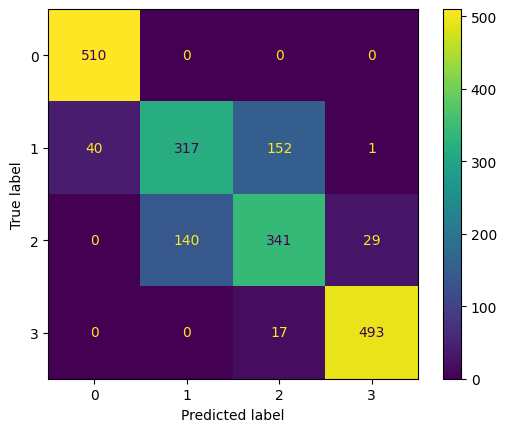

In [168]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression()
model.fit(X_final_training, Ytrain)

y_pred= model.predict(X_final_training) # Predecimos valores

metricas= {
    'Accuracy' : accuracy_score,
    'Precision': lambda y_true, y_pred : precision_score(y_true= y_true, y_pred= y_pred, average='macro'),
    'Recall'   : lambda y_true, y_pred : recall_score(y_true= y_true, y_pred= y_pred, average='macro'),
    'f1-score' : lambda y_true, y_pred : f1_score(y_true= y_true, y_pred= y_pred, average='macro'),
}

for metrica in metricas:
  f_metrica= metricas[metrica]
  valor= f_metrica(y_true= Ytrain, y_pred= y_pred)
  print('La métrica {} tiene un valor de {}'.format(metrica, valor))

cm= confusion_matrix(Ytrain, y_pred)
ConfusionMatrixDisplay(cm).plot();

In [169]:
# Predicción de y a partir de Xtrain usando SVC
svc.fit(X_final_training, Ytrain)
y_pred= svc.predict(X_final_training)

# Resultados
print('Los datos originales de salida eran: {}'.format(Ytrain))
print('Los datos predichos de salida son: {}'.format(y_pred))
aciertos= 100*np.sum( Ytrain==y_pred )/len(y_pred)
print('Tengo una tasa de aciertos del {}\%'.format(aciertos))

for metrica in metricas:
  f_metrica= metricas[metrica]
  valor= f_metrica(y_true= Ytrain, y_pred= y_pred)
  print('La métrica {} tiene un valor de {}'.format(metrica, valor))

Los datos originales de salida eran: [3 2 3 ... 0 0 1]
Los datos predichos de salida son: [3 2 3 ... 0 0 1]
Tengo una tasa de aciertos del 99.75490196078431\%
La métrica Accuracy tiene un valor de 0.9975490196078431
La métrica Precision tiene un valor de 0.9975728155339806
La métrica Recall tiene un valor de 0.9975490196078431
La métrica f1-score tiene un valor de 0.997548960711282


In [170]:
from sklearn.model_selection import cross_validate
from sklearn import metrics

model= SVC()
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_macro',
           'recall': 'recall_macro',
           'f1': 'f1_macro'}  # Se añade '_macro' para evitar el error

scores = cross_validate(model, X_final_training, Ytrain, cv=5, scoring=scoring)
print('Scores: {}'.format(scores))

# Calcular media y desviación estándar para cada métrica
for metric in scores:
    if "test_" in metric:  # Filtramos solo las métricas de test
        print(f"{metric}: Mean = {np.mean(scores[metric]):.4f}, Std = {np.std(scores[metric]):.4f}")

Scores: {'fit_time': array([0.0262444 , 0.02548337, 0.02710724, 0.02772331, 0.02601314]), 'score_time': array([0.02055001, 0.01732397, 0.01967907, 0.02065516, 0.0185492 ]), 'test_accuracy': array([0.99019608, 0.97058824, 0.99264706, 0.99509804, 0.99754902]), 'test_precision': array([0.99042996, 0.97287088, 0.99267038, 0.99512184, 0.99757282]), 'test_recall': array([0.99019608, 0.97058824, 0.99264706, 0.99509804, 0.99754902]), 'test_f1': array([0.9901573 , 0.97026557, 0.99264688, 0.99509798, 0.99754896])}
test_accuracy: Mean = 0.9892, Std = 0.0096
test_precision: Mean = 0.9897, Std = 0.0088
test_recall: Mean = 0.9892, Std = 0.0096
test_f1: Mean = 0.9891, Std = 0.0098


In [171]:
from sklearn.ensemble import RandomForestClassifier

#Prediccion de y a partir de Xtrain usando RandomForest
classifier= RandomForestClassifier()

# Entrenamos con conjunto de training
classifier.fit(X_final_training, Ytrain)

# Vemos el score de cada conjunto de datos
print('Acc. Training: {}'.format( classifier.score(X_final_training, Ytrain) ))


metricas= {
    'Accuracy' : accuracy_score,
    'Precision': lambda y_true, y_pred : precision_score(y_true= y_true, y_pred= y_pred, average='macro'),
    'Recall'   : lambda y_true, y_pred : recall_score(y_true= y_true, y_pred= y_pred, average='macro'),
    'f1-score' : lambda y_true, y_pred : f1_score(y_true= y_true, y_pred= y_pred, average='macro'),
}

y_pred= classifier.predict(X_final_training)

for metrica in metricas:
  f_metrica= metricas[metrica]
  valor= f_metrica(y_true= Ytrain, y_pred= y_pred)
  print('\tLa métrica {} tiene un valor de {}'.format(metrica, valor))

Acc. Training: 1.0
	La métrica Accuracy tiene un valor de 1.0
	La métrica Precision tiene un valor de 1.0
	La métrica Recall tiene un valor de 1.0
	La métrica f1-score tiene un valor de 1.0


In [172]:
model= RandomForestClassifier()
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_macro',
           'recall': 'recall_macro',
           'f1': 'f1_macro'}  # Se añade '_macro' para evitar el error

scores = cross_validate(model, X_final_training, Ytrain, cv=5, scoring=scoring)
print('Scores: {}'.format(scores))

# Calcular media y desviación estándar para cada métrica
for metric in scores:
    if "test_" in metric:  # Filtramos solo las métricas de test
        print(f"{metric}: Mean = {np.mean(scores[metric]):.4f}, Std = {np.std(scores[metric]):.4f}")

Scores: {'fit_time': array([0.56079197, 0.52474308, 0.56809282, 0.61476421, 0.57600021]), 'score_time': array([0.02353668, 0.0196178 , 0.02240658, 0.01954818, 0.01943541]), 'test_accuracy': array([1.        , 0.99754902, 0.99754902, 0.99509804, 0.99264706]), 'test_precision': array([1.        , 0.99757282, 0.99757282, 0.99514563, 0.99267038]), 'test_recall': array([1.        , 0.99754902, 0.99754902, 0.99509804, 0.99264706]), 'test_f1': array([1.        , 0.99754896, 0.99754896, 0.99508573, 0.99264688])}
test_accuracy: Mean = 0.9966, Std = 0.0025
test_precision: Mean = 0.9966, Std = 0.0025
test_recall: Mean = 0.9966, Std = 0.0025
test_f1: Mean = 0.9966, Std = 0.0025


## **5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar)**

En esta parte vamos a encontrar los mejores valores para los parámetros que controlan el comportamiento de LogisticRegression, SCV y RandomForest.

Tenemos que tener en cuenta que SVC y RandomForest por defecto ya tenían una puntuación casi perfecta, asi que nio hay mucho margen de mejora, y la busqueda e hiperparámetros óptimos debería tender a simplificar el modelo.

En LogisticRegression vamos a optimizar los siguientes hiperparámetros:
* C: Controla la regularización (valores más bajos = más regularización, menos sobreajuste).
* penalty: Tipo de regularización. l2 es la más usada. l1 puede ayudar a seleccionar variables. Con elasticnet se añaden tanto l1 como l2. Hay que tener en cuenta que el parámetro l1_ratio debe especificarse cuando la penalización es elasticnet. Para 0 < l1_ratio <1, la penalización es una combinación de l1 y l2.
* solver: El algoritmo a usar en el metodo de optimización. Para conjuntos de datos pequeños, «liblinear» es una buena opción, mientras que «sag» y «saga» son más rápidos para los grandes. Hay q tener cuidado con lo siguiente:
'lbfgs' se puede usar con el siguiente penalty: None y 'l2'. 'liblinear' se puede usar con el siguiente penalty: 'l1' y 'l2' y 'saga' funciona bien con todos.


Vamos a usar el siguiente método:

1) **GridSearchCV** usa un conjunto predifinido p_grid, y prueba todos los valores que se encuentran en el mismo, lo que es manejable si la cantidad de combinaciones es pequeña.
Luego si p_grid tiene valores bien elegidos, se pueden encontrar buenos hiperparámetros sin perder demasiado tiempo.
Además los experimentos son consistentes y fáciles de comparar.

Tiene los siguientes puntos negativos: Si los valores en p_grid no son óptimos, se pueden ignorar combinaciones mejores.
Además si p_grid tiene muchos valores, el proceso de búsqueda puede volverse lento.


In [173]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Set up possible values of parameters to optimize over
p_grid = [
    {"C": [ 0.001, 0.01, 0.1, 1], "penalty": ["l2"], "solver": ["lbfgs"]},
    {"C": [0.001, 0.01, 0.1, 1, 10], "penalty": ["l1", "l2"], "solver": ["liblinear", "saga"]},
    {"C": [0.001, 0.01, 0.1, 1, 10], "penalty": ["elasticnet"], "l1_ratio": [0.5], "solver": ["saga"]}
]

lrmodel = LogisticRegression(max_iter=5000)

clf = GridSearchCV(estimator=lrmodel, param_grid=p_grid, cv=5)
clf.fit(X_final_training, Ytrain)

best_params_global_lr = clf.best_params_

print(f"\nMejores hiperparámetros globales: {best_params_global_lr}")
print(f"Mejor score alcanzado: {clf.best_score_}")



Mejores hiperparámetros globales: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Mejor score alcanzado: 0.8382352941176471


En SVC vamos a optimizar los siguientes hiperparámetros:
* C: Parámetro de regularización. La potencia de la regularización es inversamente proporcional a C. Debe ser estrictamente positiva. La penalización es una penalización l2 al cuadrado.
* kernel: Especifica el tipo de kernel que se utilizará en el algoritmo. Si no se especifica ninguno, se utilizará 'rbf'.
* gamma: Parámetro del kernel para 'rbf', 'poly' and 'sigmoid'

Y para el kernel = 'linear' vamos a optimizar:
* degree: Grado de la función kernel polinómica. Debe ser no negativo. Ignorado por todos los demás kernels.

In [174]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Set up possible values of parameters to optimize over
p_grid = [
    {"C": [1, 10, 100], "kernel": ["linear"]},  # No usa 'degree' ni 'gamma'
    {"C": [1, 10, 100], "kernel": ["rbf"], "gamma": [0.01, 0.1]},
    {"C": [1, 10, 100], "kernel": ["sigmoid"], "gamma": [0.01, 0.1]},
]

svm = SVC()

clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=4)
clf.fit(X_final_training, Ytrain)

best_params_global_svm1 = clf.best_params_

print(f"\nMejores hiperparámetros globales: {best_params_global_svm1}")
print(f"Score alcanzado: {clf.best_score_}")



Mejores hiperparámetros globales: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Score alcanzado: 0.9980392156862745


In [175]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Set up possible values of parameters to optimize over
p_grid = [
    {"C": [1, 10, 100], "kernel": ["poly"], "degree": [2, 3, 4], "gamma": [0.01, 0.1]}
]

svm = SVC()

clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=4)
clf.fit(X_final_training, Ytrain)

best_params_global_svm2 = clf.best_params_

print(f"\nMejores hiperparámetros globales: {best_params_global_svm2}")
print(f"Score alcanzado: {clf.best_score_}")


Mejores hiperparámetros globales: {'C': 100, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
Score alcanzado: 0.9990196078431373


Vemos que los hiperparámetros que obtienen un mejor resultado son {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}, aunque el polinomico también obtiene muy buenos resultados. He separado la optimización de hiperparámetros del kernel polinómico porque el parámetro degree(que es el grado de la función de kernel polinómico) es ignarado por los otros kernels.

En RandomForest vamos a optimizar los siguientes parámetros:

* n_estimators: Número de árboles en el bosque.Un número mayor generalmente mejora el rendimiento, pero aumenta el costo computacional

* max_depth: Profundidad máxima de los árboles. Un valor bajo puede llevar a un modelo subajustado, mientras que un valor alto puede causar sobreajuste.

* min_samples_split: Mínimo de muestras necesarias para dividir un nodo. Mínimo número de muestras necesarias para dividir un nodo. Valores más altos reducen la complejidad del modelo.

* min_samples_leaf: Mínimo de muestras por hoja. Un punto de división en cualquier profundidad sólo se considerará si deja al menos min_samples_leaf muestras de entrenamiento en cada una de las ramas izquierda y derecha.


In [176]:
# Set up possible values of parameters to optimize over
p_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
   # "min_samples_split": [2, 5, 10],
   # "min_samples_leaf": [1, 2, 5]
}

rf = RandomForestClassifier(random_state=123)

clf = GridSearchCV(estimator=rf, param_grid=p_grid, cv=4)
clf.fit(X_final_training, Ytrain)


best_params_global_rf = clf.best_params_

print(f"\nMejores hiperparámetros globales: {best_params_global_rf}")
print(f"Score alcanzado: {clf.best_score_}")


Mejores hiperparámetros globales: {'max_depth': None, 'n_estimators': 50}
Score alcanzado: 0.9970588235294118


In [177]:
# Set up possible values of parameters to optimize over
p_grid = {
    "n_estimators": [100],
    "max_depth": [None],
   "min_samples_split": [2, 5, 10],
   "min_samples_leaf": [1, 2, 5]
}

rf = RandomForestClassifier(random_state=123)

clf = GridSearchCV(estimator=rf, param_grid=p_grid, cv=4)
clf.fit(X_final_training, Ytrain)


best_params_global_rf = clf.best_params_

print(f"\nMejores hiperparámetros globales: {best_params_global_rf}")
print(f"Score alcanzado: {clf.best_score_}")


Mejores hiperparámetros globales: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Score alcanzado: 0.9970588235294118


## **6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones**

Una vez que hemos seleccionado los hiperparámetros, vamos a entrenar el modelo definitivo y evaluar su rendimiento en los datos que hemos separado para la evaluación y el test. Para ello vamos a usar las métricas que hemos discutido antes.

Antes tenemos que separar la parte de validación del conjunto del training:

In [178]:
Xtrain_, Xval, Ytrain_, Yval= train_test_split(X_final_training, Ytrain, test_size= 0.176470588, random_state= 123, stratify=Ytrain)

Xtrain_.shape, Xval.shape, X_final_test.shape

((1680, 9), (360, 9), (360, 9))

Evaluación en Validación - LogisticRegression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       0.76      0.70      0.73        90
           2       0.70      0.71      0.70        90
           3       0.92      0.97      0.94        90

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.84      0.84      0.84       360

Evaluación en Test - LogisticRegression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       0.72      0.61      0.66        90
           2       0.62      0.68      0.65        90
           3       0.91      0.96      0.93        90

    accuracy                           0.81       360
   macro avg       0.81      0.81      0.81       360
weighted avg       0.81      0.81      0.81       360



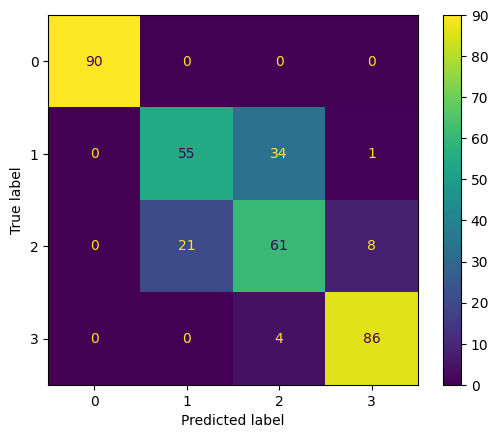

In [179]:
from sklearn.metrics import classification_report

# Entrenar modelo LogistcRegression con mejores hiperparámetros
best_lr = LogisticRegression(**best_params_global_lr, max_iter=5000)
best_lr.fit(Xtrain_, Ytrain_)

# Evaluación en conjunto de validación
y_val_pred_lr = best_lr.predict(Xval)

print("Evaluación en Validación - LogisticRegression")
print(classification_report(Yval, y_val_pred_lr))

#Si el modelo tiene buen rendimiento en validación, lo probamos en el conjunto de prueba:
# Evaluación en conjunto de prueba
y_test_pred_lr = best_lr.predict(X_final_test)

print("Evaluación en Test - LogisticRegression")
print(classification_report(Ytest, y_test_pred_lr))

cm_lr= confusion_matrix(Ytest, y_test_pred_lr)
ConfusionMatrixDisplay(cm_lr).plot();

Evaluación en Validación - SVM
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        90
           1       0.99      1.00      0.99        90
           2       1.00      1.00      1.00        90
           3       1.00      1.00      1.00        90

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360

Evaluación en Test - SVM
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        90
           1       0.91      1.00      0.95        90
           2       1.00      1.00      1.00        90
           3       1.00      1.00      1.00        90

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360



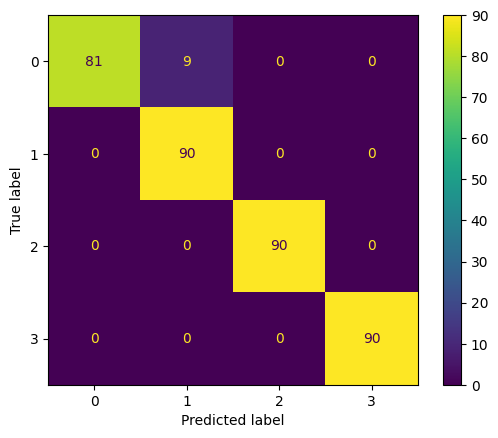

In [180]:
from sklearn.metrics import classification_report

# Entrenar modelo SVM con mejores hiperparámetros
best_svm = SVC(**best_params_global_svm1)
best_svm.fit(Xtrain_, Ytrain_)

# Evaluación en conjunto de validación
y_val_pred_svm = best_svm.predict(Xval)

print("Evaluación en Validación - SVM")
print(classification_report(Yval, y_val_pred_svm))

#Si el modelo tiene buen rendimiento en validación, lo probamos en el conjunto de prueba:
# Evaluación en conjunto de prueba
y_test_pred_svm = best_svm.predict(X_final_test)

print("Evaluación en Test - SVM")
print(classification_report(Ytest, y_test_pred_svm))

cm_svm= confusion_matrix(Ytest, y_test_pred_svm)
ConfusionMatrixDisplay(cm_svm).plot();

Evaluación en Validación - RandomForest
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        90
           1       0.99      1.00      0.99        90
           2       1.00      1.00      1.00        90
           3       1.00      1.00      1.00        90

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360

Evaluación en Test - RandomForest
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        90
           1       0.91      1.00      0.95        90
           2       1.00      0.99      0.99        90
           3       0.99      1.00      0.99        90

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



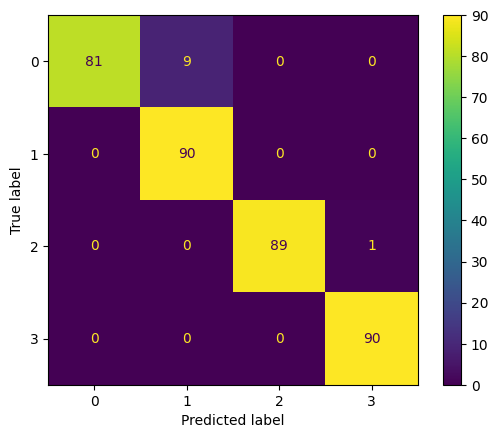

In [181]:
# Entrenar modelo RandomForest con mejores hiperparámetros
best_rf = RandomForestClassifier(**best_params_global_rf)
best_rf.fit(Xtrain_, Ytrain_)

# Evaluación en conjunto de validación
y_val_pred_rf = best_rf.predict(Xval)

print("Evaluación en Validación - RandomForest")
print(classification_report(Yval, y_val_pred_rf))

#Si el modelo tiene buen rendimiento en validación, lo probamos en el conjunto de prueba:
# Evaluación en conjunto de prueba
y_test_pred_rf = best_rf.predict(X_final_test)

print("Evaluación en Test - RandomForest")
print(classification_report(Ytest, y_test_pred_rf))

cm_rf= confusion_matrix(Ytest, y_test_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot();

Discusión de resultados y extracción de conclusiones

---

En este problema habiá que desarrollar un modelos de Aprendizaje Automático para clasificar el estado de la carne en cuatro categorías("excelente", "buena", "aceptable" y "estropeada"), utilizando mediciones de 11 sensores de gas. Hemos usado los siguientes algoritmos de clasificación: Regresión Logística, SVC y Random Forest, evaluando su rendimiento en un conjunto de validación y un conjunto de prueba para evitar el Data Snooping.

Viendo los resultados obtenidos podemos extraer las siguientes conclusiones:

1) Regresión Logística:
* Validación: Exactitud del 84%.
* Test: Exactitud del 81%.

Vemos que tiene un buen rendimiento en la clasificación de las clases 0 (excelente) y 3 (estropeada), con una precisión del 100% y 92%-91%, respectivamente al contrario que en la clasificación de las clases 1 (buena) y 2 (aceptable), con un f1-score de 0.66-0.65 en el conjunto de prueba.
Estos resultados nos hacen pensar que tiene cierta dificultad para capturar relaciones no lineales en los datos.

2) Support Vector Machines (SVM)
* Validación: Exactitud del 100%.
* Test: Exactitud del 97%.

Vemos que en ambos casos obtiene valores casi perfectos. Podemos ver también que falla un poco en la clasificación de la clase 0 en la prueba (precisión de 90%) y podemos tener un posible sobreajuste debido al 100% de exactitud en validación.

3) Random Forest:
* Validación: Exactitud del 100%.
* Test: Exactitud del 97%.

Vemos que tiene unos resultados similares a SVM, y de nuevo falla un poco en la clasificación de la clase 0 en la prueba (recall del 90%).
Hay que añadir que al ser un modelo basado en árboles de decisión, es más robusto frente a datos no lineales y menos sensible a la escala de los datos.

Podemos realizar las siguientes **conclusiones generales:**

Hemos visto tanto SVM como Random Forest obtienen mejores resultados que LogisticRegression, lo que nos indica que el problema no se ajusta bien a una solución lineal.
Por otro lado, aunque SVM y RandomForest han alcanzado una exactitud del 97% en el test, podemos hablar de cierto sobreajuste debido a la exactitud del 100% en validación sugiere un posible sobreajuste. Como mejor modelo escogemos Random Forest debido a su interpretabilidad y robustez, siendo capaz de  clasificar el estado de la carne con alta precisión.




# **Ejercicio 2: Problema de regresión (5 puntos)**

En este ejercicio los alumnos se enfrentarán a un problema de regresión, que tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). En particular, se enfrentarán a un problema real de uso de técnicas de aprendizaje automático para desarrollar **lenguas electrónicas** capaces de determinar el pH de una solución acuosa. El conjunto de datos se obteniene a partir de la investigación realizada en los siguientes artículos:

- S. Capel-Cuevas, M.P. Cuéllar, I. de Orbe-Payá, M.C. Pegalajar, L.F. Capitán-Vallvey, Full-range optical pH sensor array based on neural networks, Microchemical Journal, Volume 97, Issue 2, 2011, Pages 225-233, ISSN 0026-265X, <a href="https://doi.org/10.1016/j.microc.2010.09.008">https://doi.org/10.1016/j.microc.2010.09.008</a>.

- Capel-Cuevas S, López-Ruiz N, Martinez-Olmos A, Cuéllar MP, Pegalajar Mdel C, Palma AJ, de Orbe-Payá I, Capitán-Vallvey LF. A compact optical instrument with artificial neural network for pH determination. Sensors (Basel). 2012;12(5):6746-63. doi: 10.3390/s120506746. Epub 2012 May 22. PMID: 22778668; PMCID: PMC3386767 (URL: <a href="https://pubmed.ncbi.nlm.nih.gov/22778668/">https://pubmed.ncbi.nlm.nih.gov/22778668/</a>.




## Contexto y motivación del problema

El pH es una medida que indica la acidez o alcalinidad de una solución. Se mide en una escala que va de 0 a 14, donde un pH de 7 es considerado neutro, valores por debajo de 7 indican acidez y valores por encima de 7 indican alcalinidad.

Las utilidades del pH son bastante amplias. Algunas son:

1. **En la agricultura**: Conocer el pH del suelo es crucial para determinar qué cultivos pueden crecer mejor en esa tierra y para ajustar la fertilización.

2. **En química**: En laboratorios, el pH es fundamental para llevar a cabo reacciones químicas adecuadas, ya que muchas reacciones dependen de un pH específico.

3. **En medicina**: En el ámbito médico, el pH de la sangre y otros fluidos corporales puede ser un indicador importante de la salud de una persona.

4. **En el tratamiento de aguas**: El pH del agua es esencial para asegurar que sea segura para el consumo y para el tratamiento de aguas residuales.

5. **En cosmética**: En productos de cuidado personal, el pH puede afectar la eficacia y la seguridad de los productos en la piel.


Habitualmente, el análisis de pH de una disolución es un proceso que conlleva la toma de muestras de la solución en cuestión, su transporte a un laboratorio, el análisis con métodos específicos de tratamiento (pH-metros) y el informe final de análisis de pH.


Como alternativa, **en esta práctica pretendemos elaborar un modelo de aprendizaje automático** capaz de ser integrado en **lenguas electrónicas** sensibles al pH de una disolución. Una lengua electrónica es un dispositivo o sistema que simula la capacidad del sentido del gusto y que se utiliza para analizar y evaluar diferentes líquidos, como alimentos y bebidas, mediante la detección de compuestos químicos.

<img src="https://pub.mdpi-res.com/biosensors/biosensors-08-00003/article_deploy/html/images/biosensors-08-00003-ag-550.jpg?1569758982" />

Estas *lenguas* funcionan a través de sensores que responden a diferentes sustancias químicas, generando un perfil de sabor que puede ser analizado y comparado. Son muy útiles en la industria alimentaria para controlar la calidad, desarrollar nuevos productos y realizar pruebas de sabor de manera objetiva. Además, las lenguas electrónicas pueden ser utilizadas en otras áreas, como el monitoreo ambiental y la detección de contaminantes. En resumen, son herramientas valiosas para obtener información sobre el sabor y la composición de líquidos de manera precisa y eficiente.

<img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fs41378-024-00690-9/MediaObjects/41378_2024_690_Figa_HTML.png" />


## El conjunto de datos

El modelo de regresión a desarrollar en esta práctica **tendrá como entrada los valores de un array de sensores (*papilas gustativas*) localizado en una lengua electrónica sensible al pH, y deberá proporcionar como resultado el valor de pH de la solución acuosa que entre en contacto con dicha lengua electrónica**.

En total dispondremos de **12 sensores distintos** (*papilas gustativas* de distinto tipo), capaces de cambiar de color ante la presencia de pH de distinta magnitud. Estos sensores se imprimen químicamente sobre un soporte o tarjeta, la cual se entra en contacto con la disolución para capturar sus propiedades.  El diseño de la disposición de estos sensores es la mostrada en la siguiente figura:


<center>
<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0925400511001730-gr1.jpg" />
</center>

La reacción de cada sensor frente al pH produce un cambio de color en el mismo. Cada sensor se corresponde con un compuesto químico capaz de cambiar de color ante la detección de pH en un rango determinado. En concreto, el cambio se produce en la tonalidad o componente *Hue (H)* del espacio de color HSV (<a href="https://es.wikipedia.org/wiki/Modelo_de_color_HSV">https://es.wikipedia.org/wiki/Modelo_de_color_HSV</a>).


Cuando el array de sensores entra en contacto con una disolución, el valor de tonalidad color H del espacio HSV es capturado por el dispositivo electrónico (lengua electrónica) que se muestra en la siguiente figura, y es trasladado a un modelo de aprendizaje automático capaz de determinar el pH de la solución.

<center>
<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0925400511001730-gr3.jpg" />
</center>


El modelo de decisión para determinar el pH de la disolución a partir de los datos de los sensores necesita ser entrenado previamente para tener un desempeño correcto. El conjunto de datos a utilizar tiene el siguiente formato:

- **Datos de entrada (X)**: Valor de tonalidad (componente H del espacio de color HSV) de cada uno de los sensores.
- **Datos de salida (Y)**: Valor de pH de la disolución.


Se ha generado un conjunto de datos para la práctica accesible desde el enlace mostrado en la siguiente celda de código, el cual deberá ser usado por el estudiante para elaborar la práctica.

In [182]:
import pandas as pd

path_to_data_regression= 'https://www.dropbox.com/scl/fi/3x7kovawtekmr20d8hd22/ElectronicTongue.csv?rlkey=7ewm92dgd09n32t576ah5kz36&st=hnabds8t&dl=1'

df2= pd.read_csv(path_to_data_regression)
df2.sample(5)




,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,pH
95,0.084737,0.093393,0.047709,0.234591,0.960511,0.952171,0.549661,0.468439,0.587335,0.457735,0.931138,0.218736,9.683825
27,0.983059,0.158620,0.146499,0.258742,0.034120,0.208975,0.533746,0.213613,0.309694,0.184963,0.196746,0.151960,3.195685
17,0.985589,0.126911,0.146335,0.249118,0.060894,0.193440,0.541841,0.214512,0.308121,0.175006,0.207460,0.113988,2.456325
150,0.984824,0.161574,0.145058,0.248485,0.081772,0.191667,0.528120,0.199481,0.303108,0.167100,0.203083,0.113782,2.323130
177,0.985323,0.133635,0.146063,0.244556,0.093888,0.191031,0.536687,0.180221,0.278081,0.189178,0.227880,0.106807,1.937818



## Tareas a realizar:

El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):

1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un *ensemble*.
5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar, en su caso).
6. Entrenamiento y estimación del error fuera de la muestra usada para optimizar el modelo. Discusión de resultados y extracción de conclusiones.


## **1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición**

Se trata de un problema de Aprendizaje Supervisado. En este caso nos enfrentamos a una tarea de regresión que tendrá como entrada los valores de un array de 12 sensores (papilas gustativas) localizado en una lengua electrónica sensible al pH(los predictores del modelo de regresión), y deberá proporcionar como resultado el valor de pH de la solución acuosa que entre en contacto con dicha lengua electrónica.
 Para entrenar el sistema, hay que darle muchos ejemplos de lenguas electrónicas, incluidos tanto sus predictores como sus etiquetas (es
decir, el valor de pH).

Como hemos comentado, se trata de un problema de Aprendizaje Supervisado, luego se asume conocido un conjunto de datos
E/S ${(X_i, y_i)}$,con i desde 1 hasta L(núumero de patrones existente en el conjunto de datos), con valores de entrada $X_i = (x_{i,1}, x_{i,2}, ..., x_{i,n})$ y al tratarse de un problema de regresión dado $y_i \in \mathbb{R}$ un valor numérico,
se espera poder calcular una aproximación $y_i' = f (X_i)$ tal que $y_i' ≈ y_i$.

En este problema, la variable objetivo(el pH) es un tipo de dato numérico, por lo que no va a ser necesario una codificación de datos.

Antes vamos a mostrar la matriz de correlación entre los sensores. Una matriz de correlación es una tabla que muestra los coeficientes de correlación entre múltiples variables. Cada celda de la tabla representa la correlación entre dos variables, permitiendo una evaluación visual rápida de las relaciones entre ellas.
 Los valores de una matriz de correlación suelen oscilar entre -1 y 1, donde -1 indica una correlación negativa perfecta, 1 indica una correlación positiva perfecta y 0 indica que no hay correlación.

En este caso nos muestra que algunos sensores tienen una relación en bastantes casos alta entre sí(hay más relacioń que en el ejercicio 1). Esto podría indicar redundancia en los datos y sugiere que podríamos aplicar técnicas de reducción de dimensionalidad, como PCA, para mejorar el modelo.

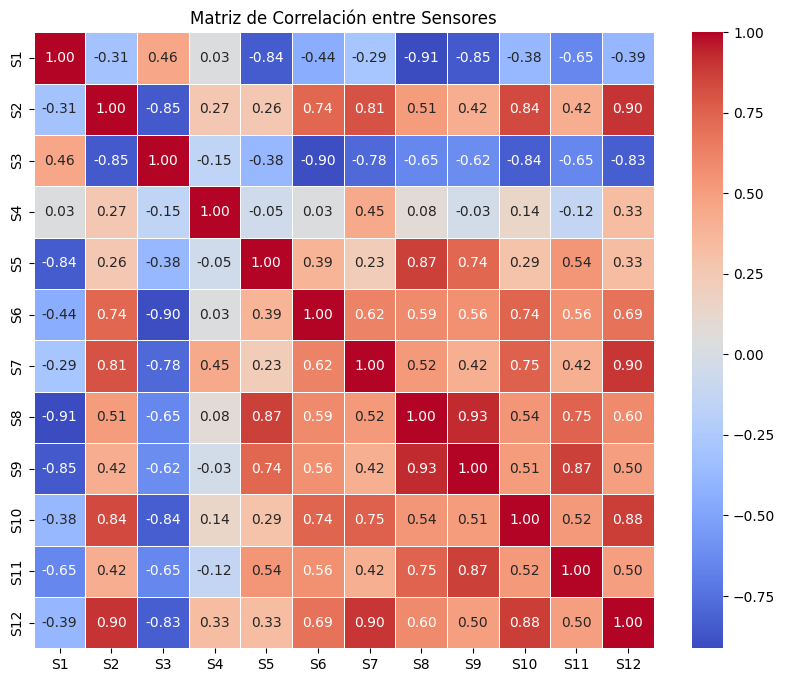

In [183]:
import seaborn as sns

# Matriz de correlación entre los sensores
plt.figure(figsize=(10, 8))
sns.heatmap(df2.drop(columns=[ "pH"]).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Sensores")
plt.show()

Ahora vamos a separar las variables independientes(los sensores) de la varible dependiente u objetivo, y vamos a obtener información del dataset, como su tamaño o el número de valores que tiene la variable pH.

Además vamos a comprobar si hay datos nulos, ya que de haberlos es importante quitarlos o sustituirlos por otros valores aproximados. Un valor perdido es un valor desconocido dentro de una celda en nuestro conjunto de datos y en NumPy se suelen representar mediante el valor np.nan. Existen varias técnicas de tratamiento de valores perdidos pero en este dataset podemos comprobar que no hay valores nulos.

In [184]:
data2= df2.to_numpy()

X2= data2[:, :-1].astype(float) #Selecciona todas las filas (:) y todas las columnas excepto la última (:-1). Es decir, está extrayendo las características (variables independientes).
y2= data2[:, -1].astype(float) #Selecciona todas las filas (:) y solo la última columna (-1). Esto significa que extrae la variable objetivo o etiqueta (variable dependiente).

print('Conjunto de datos con {} patrones y {} atributos. Tiene {} valores de pH.\n'.format(X2.shape[0], X2.shape[1], len(np.unique(y2))))

#Comprobamos si hay valores nulos. Dos opciones
print('El numero de valores nulos es: \n{}\n'.format(df2.isnull().sum()))
print(df2.info())

Conjunto de datos con 197 patrones y 12 atributos. Tiene 197 valores de pH.

El numero de valores nulos es: 
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
S7     0
S8     0
S9     0
S10    0
S11    0
S12    0
pH     0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S1      197 non-null    float64
 1   S2      197 non-null    float64
 2   S3      197 non-null    float64
 3   S4      197 non-null    float64
 4   S5      197 non-null    float64
 5   S6      197 non-null    float64
 6   S7      197 non-null    float64
 7   S8      197 non-null    float64
 8   S9      197 non-null    float64
 9   S10     197 non-null    float64
 10  S11     197 non-null    float64
 11  S12     197 non-null    float64
 12  pH      197 non-null    float64
dtypes: float64(13)
memory usage: 20.1 KB
None


Importante también comprobar que la variable objetivo("pH"), no esté desbalanceada, ya que si algunas categorías tienen muchas más muestras que otras, el modelo podría sesgarse hacia la clase mayoritaria. En este caso, vemos que se trata de un problema de regresión y el pH es continuo, luego no tiene sentido hablar de balanceo de datos.

In [185]:
valores, conteos = np.unique(y2, return_counts=True)

for valor, conteo in zip(valores, conteos):
    print(f'El valor {valor} aparece {conteo} veces')

El valor 0.0376329040404896 aparece 1 veces
El valor 0.1039692996245824 aparece 1 veces
El valor 0.2258088937302356 aparece 1 veces
El valor 0.4104761205127978 aparece 1 veces
El valor 0.450771089130936 aparece 1 veces
El valor 0.6102804931865677 aparece 1 veces
El valor 0.680106459819763 aparece 1 veces
El valor 0.8354905525339569 aparece 1 veces
El valor 1.108085450334873 aparece 1 veces
El valor 1.11112106529222 aparece 1 veces
El valor 1.144921219315793 aparece 1 veces
El valor 1.1647298366541428 aparece 1 veces
El valor 1.1886582846854463 aparece 1 veces
El valor 1.2894691592310523 aparece 1 veces
El valor 1.3065739451774907 aparece 1 veces
El valor 1.3399752325734196 aparece 1 veces
El valor 1.4827187907953936 aparece 1 veces
El valor 1.5594904025080203 aparece 1 veces
El valor 1.61865753111014 aparece 1 veces
El valor 1.6888013238645323 aparece 1 veces
El valor 1.7114096948550708 aparece 1 veces
El valor 1.8008367651313202 aparece 1 veces
El valor 1.8325293092971304 aparece 1 ve

Ahora vamos a generar un diagrama de cajas y bigotes para cada sensor de gas en el dataset. Recordemos que la caja central abarca desde el percentil 25 (Q1) hasta el percentil 75 (Q3). La línea dentro de la caja indica la Mediana - Q2. Los bigotes muestran los valores dentro de 1.5 veces el IQR. Por último los puntos fuera de los bigotes son valores atípicos.

En la gráfica resultante podemos ver que casi todos los sensores tienen valores atípicos. Además algunos sensores como MQ6 y MQ8 tienen una distribución más dispersa.

Esto nos puede servir para el procesado de datos extremos/atípicos. En este caso vemos que sería bueno realizarlo para evitar que los algoritmos se vean afectados por valores extremos.

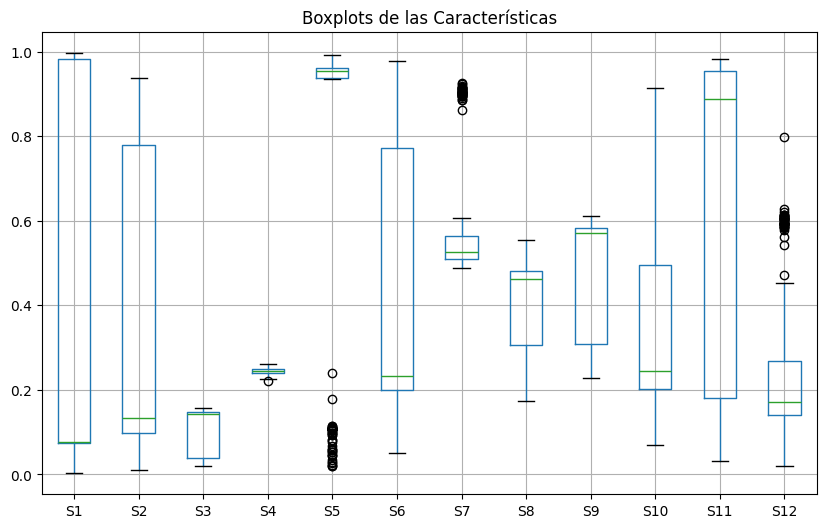

In [186]:
# Crear boxplots para cada columna numérica
plt.figure(figsize=(10, 6))
df2.boxplot(column=['S1',	'S2',	'S3',	'S4',	'S5',	'S6',	'S7',	'S8',	'S9',	'S10',	'S11',	'S12'])
plt.title("Boxplots de las Características")
plt.show()

Para tener más claro como están distribuidos los valores de los sensores vamos a crear un histograma para cada uno de ellos. Un histograma es una representación gráfica de la distribución de un conjunto de datos. Muestra cómo se distribuyen los valores de una variable(en el eje X) y proporciona una visión rápida de la frecuencia con la que ocurren ciertos rangos de valores dentro del conjunto de datos(eje Y).

Podemos extraer las siguientes conclusiones:

* Sería recomendable normalizar los datos porque las variables presentan escalas muy diferentes (S4 con rango 0.220-0.260 vs S1 con 0.0-1.0) y los boxplots muestran que algunas variables (como S3 y S4) tienen magnitudes mucho menores que otras.
* Algunas variables como S1, S2, S5, S6, S11 y S12 pueden tener outliers que distorsionan su distribución mientras que  S3, S4, S7, S8, S9 son variables más concentradas



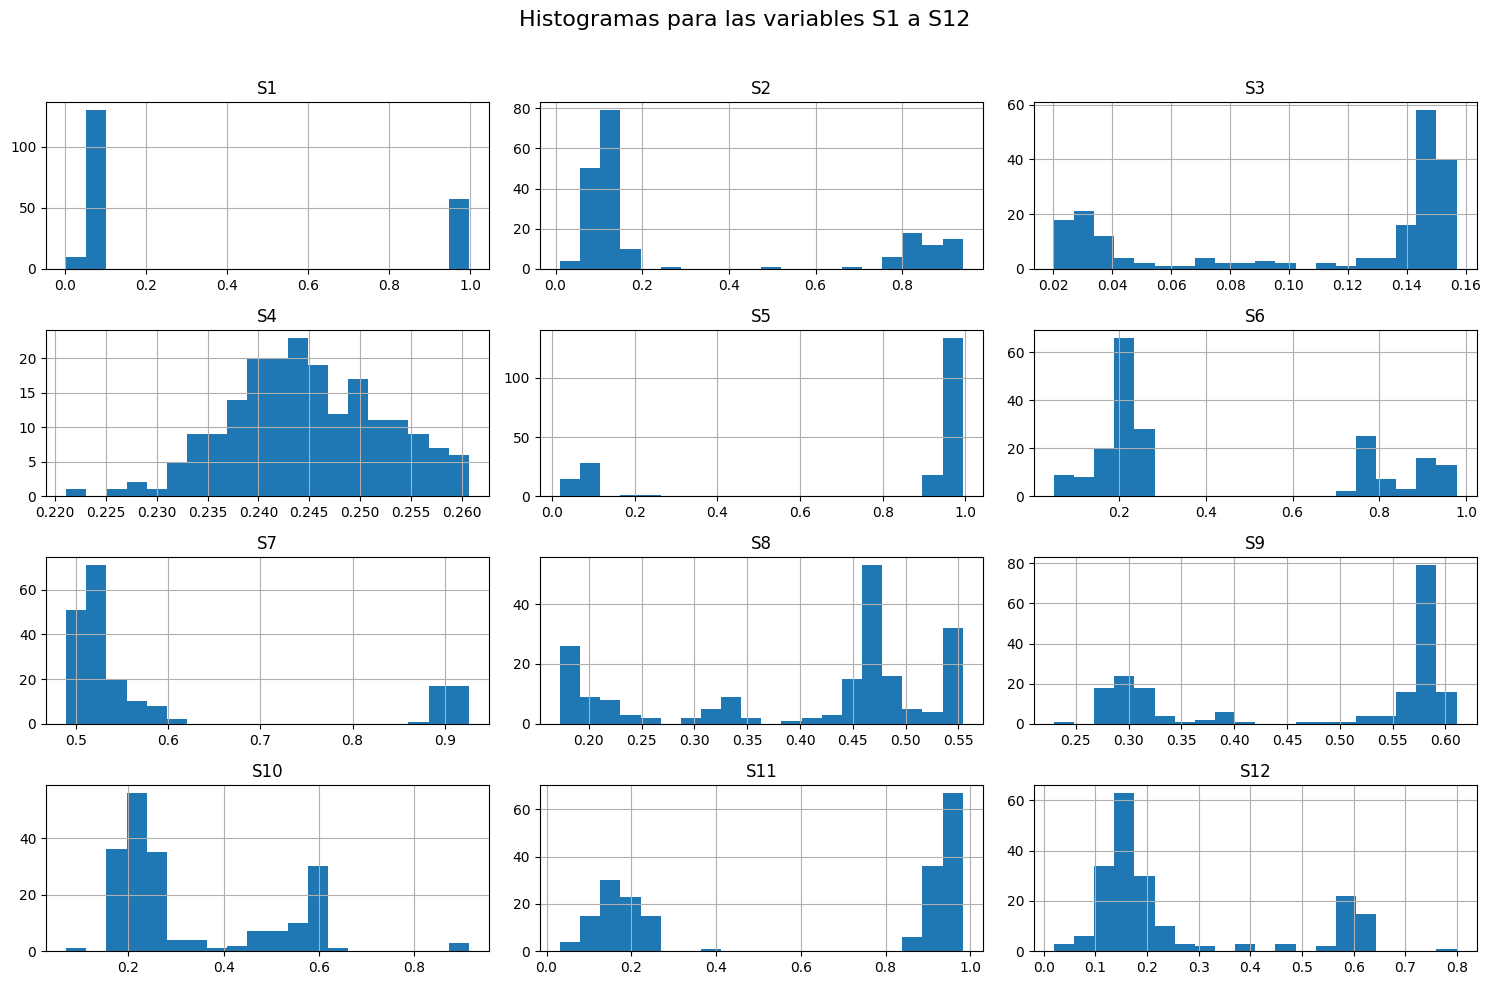

In [187]:
df2[['S1',	'S2',	'S3',	'S4',	'S5',	'S6',	'S7',	'S8',	'S9',	'S10',	'S11',	'S12']].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogramas para las variables S1 a S12', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## **2.Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.**

Vamos a dividir los datos de la siguiente forma:

-> Entrenamiento (70%): Para ajustar los modelos

-> Validación (15%): Para la selección de hiperparámetros y evitar sobreajuste.

-> Test (15%): Para evaluar el rendimiento final del modelo en datos no vistos.

Vamos a hacer esta división de manera estratificada, asegurándonos de que todas las clases de la variable objetivo estén representadas proporcionalmente en cada conjunto.

Vamos a usar train_test_split dos veces, durante el procesamiento, y en general antes de llegar al partado final de entrenamiento y estimación del error fuera de la muestra vamos a trabajar con:

-> Entrenamiento(85%)

-> Test(15%)

Luego separaremos el 15% del entrenamiento para la validación, de tal manera que nos quede 70% entrenamiento, 15% validación y 15% test. El procesamiento lo vamos a realizar sobre el conjunto de training y test por separado para evitar el DATA SNOOPING.

In [188]:
from sklearn.model_selection import train_test_split

#con random_state fijamos la semilla
Xtrain2, Xtest2, Ytrain2, Ytest2= train_test_split(X2, y2, test_size= 0.15, random_state= 123)
#Xval, Xtest, Yval, Ytest = train_test_split(Xtemp, Ytemp, test_size=0.50, random_state=123, stratify=Ytemp)

Xtrain2.shape, Xtest2.shape, Ytrain2.shape, Ytest2.shape

((167, 12), (30, 12), (167,), (30,))

Como estamos ante un problema de regresión, vamos a usar las siguiente métricas:

* SE (Square Error). Error cuadrático, calculado como
\begin{equation}
SE = {\sum_{i=1}^{L} (y_i'-y_i)^2}
\end{equation}

* MSE (Mean Square Error). Error cuadrático medio, calculado como
\begin{equation}
MSE = \frac{1}{L}{\sum_{i=1}^{L} (y_i'-y_i)^2}
\end{equation}

* MAE (Mean Absolute Error). Error absoluto promedio, calculado
como
\begin{equation}
MAE = \frac{1}{L}{\sum_{i=1}^{L} \left| y_i'-y_i \right|}
\end{equation}

* MAPE (Mean Absolute Percentual Error). Error porcentual
absoluto promedio, calculado como
\begin{equation}
MAPE = \frac{1}{L}{\sum_{i=1}^{L} \left| \frac{y_i'-y_i}{y_i} \right|}
\end{equation}

* El $R^²$ (Coeficiente de determinación) es una métrica que mide qué tan bien un modelo de regresión explica la variabilidad de la variable dependiente (objetivo).
Interpretación: Si $R^²=1$: El modelo predice perfectamente los valores y conforme se vaya acercando a 0 el modelo explica peor los datos.

donde $y'$ es el valor predicho por el modelo e $y$ el valor real esperado.


In [189]:
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

## **3.Preprocesado de datos**

Para terminar de determinar a que sensores le vamos a aplicar el tratamiento de valores atípicos, vamos a calcular el IQR(Interquartile Range) que representa la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1) en un conjunto de datos.

\begin{equation}
IQR = {Q3-Q1}
\end{equation}

donde: Q1 (Primer cuartil) es el valor por debajo del cual se encuentra el 25% de los datos y Q3 (Tercer cuartil) es el valor por debajo del cual se encuentra el 75% de los datos.

In [190]:
# 1. Calcular cuartiles (Q1 y Q3)
Q1_ = np.percentile(Xtrain2, 25, axis=0)  # Percentil 25 (Q1)
Q3_ = np.percentile(Xtrain2, 75, axis=0)  # Percentil 75 (Q3)
IQR2 = Q3_ - Q1_  # Rango intercuartílico

print("IQR: ")
for i in range(1, 13, 1):
  print("S{}: {}".format(i, IQR2[i-1]))


IQR: 
S1: 0.9101006237674423
S2: 0.4782926175458293
S3: 0.10636842155917461
S4: 0.010551040625384617
S5: 0.02633627448533904
S6: 0.5682044757094831
S7: 0.04481585036755931
S8: 0.23178764466227536
S9: 0.2760179583684344
S10: 0.2900731081157111
S11: 0.7836171858997123
S12: 0.09695708907758122


Vemos que S1, S2, S6, S11, S12 que vimos que tenián distribuciones más dispersas además tienen un valor alto de IQR así que vamos a aplicar el siguiente tratamiento: Winsorization, que consiste en reemplazar outliers por percentiles 5 y 95.

S3,S8,S9 y S10 no son variables tan dispersas pero si tienen un valor moderadamente alto de IQR así que vamos a sustituir sus valores atpícos por la mediana.

Por último S4 y S7 tienen rangos más pequeños y un IQR más bajo y aunque S5 tiene un rango mayor su IQR es bastante bajo también por lo que no necesitan tratamiento de valores atípicos

Vamos a realizar el procesado de datos atípicos por separado tanto para el conjunto de training como para el conunto de test.

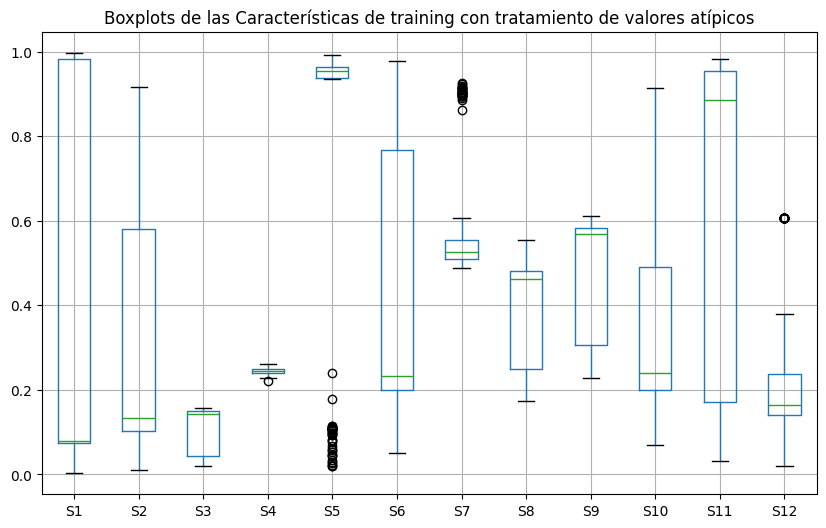

In [191]:
strategies = {
        'S1': 'winsorize', 'S2': 'winsorize', 'S6': 'winsorize',
        'S11': 'winsorize', 'S12': 'winsorize',
        'S3': 'median', 'S8': 'median', 'S9': 'median', 'S10': 'median',
        'S4': 'none', 'S5': 'none', 'S7': 'none'
    }
# 2. Definir límites para valores atípicos
lower_bound2 = Q1_ - 1.5 * IQR2
upper_bound2 = Q3_ + 1.5 * IQR2

p5 = np.percentile(Xtrain2, 5, axis=0)
p95 = np.percentile(Xtrain2, 95, axis=0)
X_cleaned_training2 = Xtrain2.copy()

columns = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12']
for i, col in enumerate(columns):
  strategy = strategies.get(col, 'none')

  if strategy == 'winsorize':
      X_cleaned_training2[:, i] = np.where(Xtrain2[:, i] < lower_bound2[i], p5[i],
                                np.where(Xtrain2[:, i] > upper_bound2[i], p95[i], Xtrain2[:, i]))

  elif strategy == 'median':
      X_cleaned_training2[:, i] = np.where((Xtrain2[:, i] <= lower_bound2[i]) | (Xtrain2[:, i] >= upper_bound2[i]), np.median(Xtrain2[:, i], axis=0), Xtrain2[:, i])

  elif strategy == 'none':
      pass

plt.figure(figsize=(10, 6))
df_cleaned2 = pd.DataFrame(X_cleaned_training2, columns=['S1',	'S2',	'S3',	'S4',	'S5',	'S6',	'S7',	'S8',	'S9',	'S10',	'S11',	'S12'])
df_cleaned2.boxplot(column=['S1',	'S2',	'S3',	'S4',	'S5',	'S6',	'S7',	'S8',	'S9',	'S10',	'S11',	'S12'])
plt.title("Boxplots de las Características de training con tratamiento de valores atípicos")
plt.show()

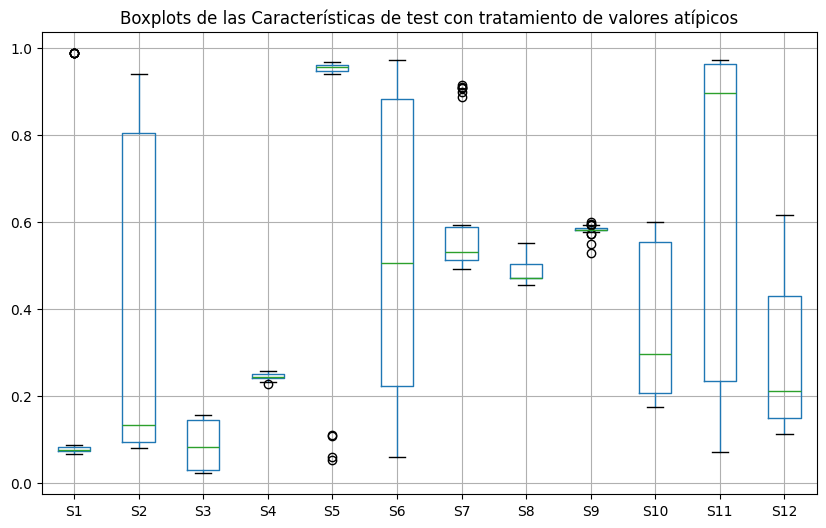

In [192]:
# 1. Calcular cuartiles (Q1 y Q3)
Q1_ = np.percentile(Xtest2, 25, axis=0)  # Percentil 25 (Q1)
Q3_ = np.percentile(Xtest2, 75, axis=0)  # Percentil 75 (Q3)
IQR2 = Q3_ - Q1_  # Rango intercuartílico

strategies = {
        'S1': 'winsorize', 'S2': 'winsorize', 'S6': 'winsorize',
        'S11': 'winsorize', 'S12': 'winsorize',
        'S3': 'median', 'S8': 'median', 'S9': 'median', 'S10': 'median',
        'S4': 'none', 'S5': 'none', 'S7': 'none'
    }
# 2. Definir límites para valores atípicos
lower_bound2 = Q1_ - 1.5 * IQR2
upper_bound2 = Q3_ + 1.5 * IQR2

p5 = np.percentile(Xtest2, 5, axis=0)
p95 = np.percentile(Xtest2, 95, axis=0)
X_cleaned_test2 = Xtest2.copy()

columns = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12']
for i, col in enumerate(columns):
  strategy = strategies.get(col, 'none')

  if strategy == 'winsorize':
      X_cleaned_test2[:, i] = np.where(Xtest2[:, i] < lower_bound2[i], p5[i],
                                np.where(Xtest2[:, i] > upper_bound2[i], p95[i], Xtest2[:, i]))

  elif strategy == 'median':
      X_cleaned_test2[:, i] = np.where((Xtest2[:, i] <= lower_bound2[i]) | (Xtest2[:, i] >= upper_bound2[i]), np.median(Xtest2[:, i], axis=0), Xtest2[:, i])

  elif strategy == 'none':
      pass

plt.figure(figsize=(10, 6))
df_cleaned2 = pd.DataFrame(X_cleaned_test2, columns=['S1',	'S2',	'S3',	'S4',	'S5',	'S6',	'S7',	'S8',	'S9',	'S10',	'S11',	'S12'])
df_cleaned2.boxplot(column=['S1',	'S2',	'S3',	'S4',	'S5',	'S6',	'S7',	'S8',	'S9',	'S10',	'S11',	'S12'])
plt.title("Boxplots de las Características de test con tratamiento de valores atípicos")
plt.show()

Como los sensores tienen valores en diferentes escalas, vamos a aplicar StandardScaler para normalizarlos. StandardScaler es un método de transformaciones de datos. Lo que hace es esttandarizarlos centrándolos en el 0 y modificando su varianza a 1. Se efectúa con sklearn.preprocessing.StandardScaler.

Lo hacemos por separado para los datos del training y del test, la diferencia que para el test no usamos fit, ya que no queremos que nos ajuste estos datos, esta metodología la vamos a repetir a lo largo del preprocesamiento

In [193]:
from sklearn.preprocessing import StandardScaler

se= StandardScaler()
se.fit(X_cleaned_training2)
X_std_training2= se.transform(X_cleaned_training2)
print('Los valores originales del training\n{}\nse han estandarizado con media 0 y std 1:\n{}'.format(X_cleaned_training2, X_std_training2))

X_std_test2= se.transform(X_cleaned_test2)
print('\nLos valores originales del test\n{}\nse han estandarizado con media 0 y std 1:\n{}'.format(X_cleaned_test2, X_std_test2))

Los valores originales del training
[[0.9881998  0.14494502 0.15279882 ... 0.17115322 0.2008366  0.14695806]
 [0.08326186 0.10784907 0.1541207  ... 0.25851384 0.96870074 0.14864257]
 [0.07862233 0.09708676 0.15199751 ... 0.26189933 0.95469935 0.1787171 ]
 ...
 [0.07412    0.90138702 0.02723318 ... 0.55211304 0.89119273 0.60733468]
 [0.98592392 0.1424237  0.15010869 ... 0.18493496 0.18569836 0.17113514]
 [0.05520648 0.13357933 0.15060155 ... 0.21479355 0.13218244 0.1356461 ]]
se han estandarizado con media 0 y std 1:
[[ 1.51066214 -0.49293074  0.79570518 ... -0.87371031 -0.9641362
  -0.56908476]
 [-0.63289945 -0.60923045  0.82136975 ... -0.37151615  1.0300125
  -0.56012336]
 [-0.64388928 -0.64297142  0.78014748 ... -0.3520546   0.99365079
  -0.40013105]
 ...
 [-0.65455412  1.87859464 -1.6421881  ...  1.31624447  0.82872365
   1.88005472]
 [ 1.50527118 -0.50083532  0.74347551 ... -0.79448572 -1.0034503
  -0.44046606]
 [-0.69935531 -0.52856337  0.75304444 ... -0.62284306 -1.14243154
  -0.

Ahora vamos a pasar a la fase de extracción y selección de carasterísticas. Esto es importante para:
1. Averiguar cuáles son los atributos que permiten predecir el resultado correcto con máxima precisión.
2. Reducir la complejidad del modelo resultante.

Primero vamos a comenzar con la extracción de características. Esta trata de combinar dos o más atributos (columnas) existentes para dar lugar a un nuevo atributo que agregue la información de ambos de forma más compacta. Para ello vamos a usar el análisis de componentes principales (PCA). Ya vimos que hay algunos sensores que tienen una relación moderada o alta entre si así que de esta manera reducimos la redundancia.

Este método realiza una reducción lineal de la dimensionalidad mediante Singular Value Decomposition de los datos para proyectarlos a un espacio de menor dimensión. Los datos de entrada se centran pero no se escalan para cada característica antes de aplicar la SVD.

Entre sus parámetros más importante tenemos:

-> n_components: int en general, es el número de componentes que se mantienen, si no se indica nada se mantienen todas las componentes

Luego llamamos a fit para ajustar el modelo con el X que le pasemos, en este caso X_std(resultado del procesado de datos atípicos y StandarScaler).

In [194]:
# Tratamos de reducir las características de los atributos
from sklearn.decomposition import PCA

pca= PCA(n_components=12) # Iniciamos PCA con 12 componentes, dado que tenemos 12 atributos
pca.fit(X_std_training2)

print('Componentes obtenidas (de mayor a menor importancia): \n{}'.format(pca.components_))
print('Varianza explicada: \n{}'.format(pca.explained_variance_))
print('Porcentaje de varianza explicada de cada componentes: \n{}'.format(pca.explained_variance_/np.sum(pca.explained_variance_)))

Componentes obtenidas (de mayor a menor importancia): 
[[ 0.26289757 -0.30907457  0.33800491 -0.07744226 -0.23488294 -0.31063467
  -0.29596594 -0.32335705 -0.30456432 -0.30493449 -0.28277675 -0.32494073]
 [-0.3963459  -0.29483265  0.17572871 -0.3155824   0.4050845  -0.11374478
  -0.30289934  0.28640674  0.31869875 -0.23130768  0.23062088 -0.25776837]
 [-0.18476036 -0.07039457  0.18511826  0.80999009  0.22802854 -0.28522654
   0.15099012  0.18941487  0.01812029 -0.19438225 -0.19772881  0.03631547]
 [ 0.20092315 -0.18662769 -0.00960584  0.22816212 -0.4542197  -0.1895693
   0.10249859 -0.0626122   0.33470946 -0.1092266   0.69843362 -0.06481571]
 [ 0.05523552 -0.07192219 -0.33974575  0.26527548 -0.00434553  0.682592
  -0.15620259 -0.02165237 -0.0155172  -0.44252147 -0.01677092 -0.344691  ]
 [ 0.16229978 -0.05469206 -0.05072895 -0.31429334  0.16519321 -0.08068464
   0.67655427  0.07073454 -0.12027336 -0.5846292   0.01135032  0.1280631 ]
 [ 0.54235391  0.27995037 -0.02283892  0.09829885  0.5

Resulta que una componente es capacez de explicar el 59,95% del total de la varianza del conjunto de datos. Y con las tres primera somos capaces de explicar el 87,96% del total de la varianza del conjunto de datos. Con tres componentes obtenemos el mejor rendimiento del modelo. Esto se debe a que las componentes adicionales pueden introducir ruido en lugar de información útil o redundancia(algunas componentes pueden estar correlacionadas con otras, aportando información duplicada en lugar de nueva), y esto puede afectar el rendimiento del modelo. Además de que demasiadas variables pueden hacer que el modelo aprenda patrones irrelevantes, reduciendo la capacidad de generalización(sobreajuste).

In [195]:
# Rehacemos PCA con 3 componente
pca= PCA(n_components=3) # Iniciamos PCA con 3 componentes
pca.fit(X_std_training2)
print('Componentes obtenidas (de mayor a menor importancia): \n{}'.format(pca.components_))
print('Varianza explicada: \n{}'.format(pca.explained_variance_))

X_pca_training2= pca.transform(X_std_training2)
print('Datos transformados de tamaño {}:\n{}'.format(X_pca_training2.shape, X_pca_training2))

# Predicción de y a partir de X_pca usando SVR.
from sklearn.svm import SVR
svr= SVR()
svr.fit(X_pca_training2, Ytrain2)
y_pred2= svr.predict(X_pca_training2)

# Resultados
r2 = r2_score(Ytrain2, y_pred2)
mse = mean_squared_error(Ytrain2, y_pred2)

print(f'R² Score: {r2:.4f}')  # Debería estar entre 0 y 1 (cuanto más alto, mejor)
print(f'Mean Squared Error: {mse:.4f}')  # Cuanto más bajo, mejor

print('\nTransformación de datos iniciales X de test de tamaño {} a X_pca'.format(X_std_test2.shape))
X_pca_test2= pca.transform(X_std_test2)

Componentes obtenidas (de mayor a menor importancia): 
[[ 0.26289757 -0.30907457  0.33800491 -0.07744226 -0.23488294 -0.31063467
  -0.29596594 -0.32335705 -0.30456432 -0.30493449 -0.28277675 -0.32494073]
 [-0.3963459  -0.29483265  0.17572871 -0.3155824   0.4050845  -0.11374478
  -0.30289934  0.28640674  0.31869875 -0.23130768  0.23062088 -0.25776837]
 [-0.18476036 -0.07039457  0.18511826  0.80999009  0.22802854 -0.28522654
   0.15099012  0.18941487  0.01812029 -0.19438225 -0.19772881  0.03631547]]
Varianza explicada: 
[7.23734565 2.38305251 0.9992738 ]
Datos transformados de tamaño (167, 3):
[[ 3.0841448  -1.91671098  0.55673106]
 [ 0.00457888  1.52586458  1.36689763]
 [ 0.14487672  2.24455535 -0.55154123]
 [ 0.9264281   1.1729775   1.38191152]
 [ 3.26287747 -1.20290423 -1.25036048]
 [-2.1014222   0.90705559 -1.45071559]
 [-3.69773253 -0.57192023 -1.09556427]
 [-4.51299985 -1.66496581  0.93407717]
 [-2.75407413  0.4883457  -2.06856678]
 [ 1.57344932  0.65578586  0.63161631]
 [ 0.070810

## **4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un  𝑒𝑛𝑠𝑒𝑚𝑏𝑙𝑒**

Vamos a usar los siguientes 3 modelos:

1. Ridge Regression:
Es un modelo lineal que se basa en la minimización del error cuadrático, lo que lo hace útil si la relación entre los sensores y el pH es aproximadamente lineal. Tambien tiene manejo de la multicolinealidad introduciendo una penalización L2(con una penalización proporcional a la magnitud de los coeficientes,w), que evita que los coeficientes crezcan demasiado, reduciendo el sobreajuste. Esta se trata de su ténica principal, reduciendo la varianza del modelo.

2. Support Vector Regression (SVR):
Capaz de modelar relaciones no lineales, lo que es útil si el pH no depende de los sensores de manera lineal. También tienerobustez ante valores atípicos, gracias al margen de tolerancia (
𝜀), que permite ignorar pequeñas desviaciones, además de flexibilidad mediante el uso de kernels, como el RBF (Radial Basis Function), que puede capturar relaciones complejas en los datos.
Su técnica principal es la función de pérdida que prediga el valor del pH con un margen de error tolerable (𝜀), ignorando pequeñas desviaciones.

3. Random Forest Regressor (Ensemble):
Es un modelo de tipo ensemble, combinando múltiples árboles de decisión, lo que reduce la varianza y mejora la estabilidad. Al promediar múltiples árboles, se reduce la posibilidad de sobreajuste de un solo árbol de decisión.
Su técnica principal es
Bagging (Bootstrap Aggregating): Se generan múltiples árboles a partir de subconjuntos aleatorios de los datos y luego se promedian las predicciones.
\begin{equation}
y' = \frac{1}{N}{\sum_{i=1}^{N} T_i(x)}
\end{equation}
Además en cada división de un árbol, se escoge un subconjunto aleatorio de sensores para evitar que un solo sensor domine la predicción(selección aleatoria de características).

Valoracion Ridge: 
La métrica MSE tiene un valor de 0.564151476153454
La métrica MAE tiene un valor de 0.5764542422184968
La métrica MAX tiene un valor de 3.743959104460441
La métrica MAPE tiene un valor de 0.9698447580617447
La métrica R2 tiene un valor de 0.9599341579508913

Valoracion SVR: 
La métrica MSE tiene un valor de 0.4308247870413678
La métrica MAE tiene un valor de 0.4202441499091567
La métrica MAX tiene un valor de 3.5108135933182347
La métrica MAPE tiene un valor de 0.8878426470930254
La métrica R2 tiene un valor de 0.9694029731409493

Valoracion RandomForest: 
La métrica MSE tiene un valor de 0.03558496124667098
La métrica MAE tiene un valor de 0.12004375371453291
La métrica MAX tiene un valor de 0.8473104678897734
La métrica MAPE tiene un valor de 0.13746611686872634
La métrica R2 tiene un valor de 0.9974727684019301


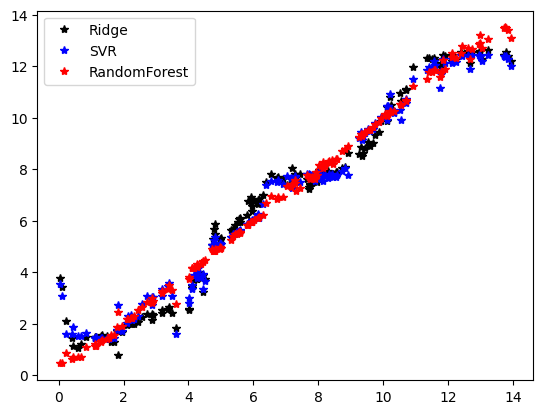

In [196]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

metricas= {
    'MSE' : mean_squared_error,
    'MAE' : mean_absolute_error,
    'MAX' : max_error,
    'MAPE': mean_absolute_percentage_error,
    'R2': r2_score
}

#Ridge Regression
ridge = Ridge()
ridge.fit(X_pca_training2, Ytrain2)
y_pred_ridge = ridge.predict(X_pca_training2)

print("Valoracion Ridge: ")
for metrica in metricas:
  f_metrica= metricas[metrica]
  valor= f_metrica(y_true= Ytrain2, y_pred= y_pred_ridge)
  print('La métrica {} tiene un valor de {}'.format(metrica, valor))

#SVR
svr= SVR()
svr.fit(X_pca_training2, Ytrain2)
y_pred_svr= svr.predict(X_pca_training2)

print("\nValoracion SVR: ")
for metrica in metricas:
  f_metrica= metricas[metrica]
  valor= f_metrica(y_true= Ytrain2, y_pred= y_pred_svr)
  print('La métrica {} tiene un valor de {}'.format(metrica, valor))

#RandomForest
model_forest= RandomForestRegressor()
model_forest.fit(X_pca_training2, Ytrain2)
y_pred_forest= model_forest.predict(X_pca_training2)

print("\nValoracion RandomForest: ")
for metrica in metricas:
  f_metrica= metricas[metrica]
  valor= f_metrica(y_true= Ytrain2, y_pred= y_pred_forest)
  print('La métrica {} tiene un valor de {}'.format(metrica, valor))

# Mostramos datos reales vs predichos para ver si se corresponden
plt.plot(Ytrain2, y_pred_ridge, 'k*')
plt.plot(Ytrain2, y_pred_svr, 'b*')
plt.plot(Ytrain2, y_pred_forest, 'r*')
plt.legend(['Ridge','SVR', 'RandomForest'])
plt.show()

## **5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar)**

En esta parte vamos a encontrar los mejores valores para los parámetros que controlan el comportamiento de Ridge, SVR y RandomForest.

Tenemos que tener en cuenta que RandomForest por defecto ya tenían una puntuación casi perfecta, asi que no hay mucho margen de mejora, y la busqueda e hiperparámetros óptimos debería tender a simplificar el modelo.

1) Ridge Regression: Hiperparámetros a ajustar:
* alpha: La potencia de la regularización; debe ser un float positivo. La regularización mejora el condicionamiento del problema y reduce la varianza de las estimaciones. Los valores mayores especifican una regularización más fuerte.

Búsqueda: [0.1, 1, 10, 100]

2) Support Vector Regression (SVR): Hiperparámetros a ajustar:
* C: Parámetro de regularización. La fuerza de la regularización es inversamente proporcional a C. Debe ser estrictamente positivo. La penalización es un l2 al cuadrado.
Búsqueda: [0.1, 1, 10, 100]

* epsilon: Define una zona de tolerancia en la cual los errores no se penalizan. Valores más grandes ignoran pequeños errores, lo que puede ayudar en datos con ruido.
Búsqueda: [0.01, 0.1, 1]

* kernel: Define la transformación que aplica el modelo para encontrar patrones no lineales.
Búsqueda: ["linear", "rbf"] (Lineal para probar un caso simple, y RBF porque suele ser más flexible).

3) Random Forest Regressor: Hiperparámetros a ajustar:
* n_estimators: Número de árboles en el bosque. Un número mayor generalmente mejora el rendimiento, pero aumenta el costo computacional.
Búsqueda: [50, 100, 200]

* max_depth: Profundidad máxima de los árboles. Un valor bajo puede llevar a un modelo subajustado, mientras que un valor alto puede causar sobreajuste.
Búsqueda: [None, 10, 20, 30] (None permite crecer sin límite, lo que puede ser útil en datasets pequeños).

* min_samples_split: Mínimo número de muestras necesarias para dividir un nodo. Valores más altos reducen la complejidad del modelo.
Búsqueda: [2, 5, 10]

Vamos a usar el siguente método:

1) **GridSearchCV** usa un conjunto predifinido p_grid, y prueba todos los valores que se encuentran en el mismo, lo que es manejable si la cantidad de combinaciones es pequeña.
Luego si p_grid tiene valores bien elegidos, se pueden encontrar buenos hiperparámetros sin perder demasiado tiempo.
Además los experimentos son consistentes y fáciles de comparar.

Tiene los siguientes puntos negativos: Si los valores en p_grid no son óptimos, se pueden ignorar combinaciones mejores.
Además si p_grid tiene muchos valores, el proceso de búsqueda puede volverse lento.

In [197]:
from sklearn.model_selection import GridSearchCV

# Definir los grids de hiperparámetros
param_grid_ridge = {"alpha": [0.01,0.05, 0.1]}

# Realizar la búsqueda de hiperparámetros
grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, scoring="r2", cv=5)

# Ajustar los modelos
grid_ridge.fit(X_pca_training2, Ytrain2)

# Obtener los mejores parámetros encontrados
best_params_ridge = grid_ridge.best_params_

best_params_ridge

{'alpha': 0.1}

In [198]:
param_grid_svr1 = {
    "C": [0.1, 1, 5 ],
    "epsilon": [0.1, 0.5, 1],
    "kernel": ["linear", "rbf"],
}

param_grid_svr = {
    'C': [0.1, 1, 5],
    'epsilon': [ 0.1, 0.5, 1],
    'kernel': ['linear', 'poly'],
    'gamma': ['scale', 'auto', 0.001, 0.01]
}

# Realizar la búsqueda de hiperparámetros
grid_svr = GridSearchCV(SVR(), param_grid_svr, scoring="r2", cv=5)

# Ajustar los modelos
grid_svr.fit(X_pca_training2, Ytrain2)

# Obtener los mejores parámetros encontrados
best_params_svr = grid_svr.best_params_

best_params_svr

{'C': 1, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'linear'}

In [199]:
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10],
}

# Realizar la búsqueda de hiperparámetros
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, scoring="r2", cv=5)

# Ajustar los modelos
grid_rf.fit(X_pca_training2, Ytrain2)

# Obtener los mejores parámetros encontrados
best_params_rf = grid_rf.best_params_

best_params_rf

{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

## **6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones**

Una vez que hemos seleccionado los hiperparámetros, vamos a entrenar el modelo definitivo y evaluar su rendimiento en los datos que hemos separado para la evaluación y el test. Para ello vamos a usar las métricas que hemos discutido antes.

Antes tenemos que separar la parte de validación del conjunto del training:

In [200]:
Xtrain_2, Xval2, Ytrain_2, Yval2= train_test_split(X_pca_training2, Ytrain2, test_size= 0.176470588, random_state= 123)

Xtrain_2.shape, Xval2.shape, X_pca_test2.shape

((137, 3), (30, 3), (30, 3))

In [201]:
# Entrenar modelo Ridge con mejores hiperparámetros
best_ridge = Ridge(**best_params_ridge)
best_ridge.fit(Xtrain_2, Ytrain_2)

# Evaluación en conjunto de validación
y_val_pred_ridge = best_ridge.predict(Xval2)

print("Evaluación en Validación - Ridge")
for metrica in metricas:
  f_metrica= metricas[metrica]
  valor= f_metrica(y_true= Yval2, y_pred= y_val_pred_ridge)
  print('La métrica {} tiene un valor de {}'.format(metrica, valor))

#Si el modelo tiene buen rendimiento en validación, lo probamos en el conjunto de prueba:
# Evaluación en conjunto de prueba
y_test_pred_ridge = best_ridge.predict(X_pca_test2)

print("\nEvaluación en Test - Ridge")
for metrica in metricas:
  f_metrica= metricas[metrica]
  valor= f_metrica(y_true= Ytest2, y_pred= y_test_pred_ridge)
  print('La métrica {} tiene un valor de {}'.format(metrica, valor))

Evaluación en Validación - Ridge
La métrica MSE tiene un valor de 0.8121291746570793
La métrica MAE tiene un valor de 0.5655431888770324
La métrica MAX tiene un valor de 3.959682442071328
La métrica MAPE tiene un valor de 3.6164935409341847
La métrica R2 tiene un valor de 0.9377070218121151

Evaluación en Test - Ridge
La métrica MSE tiene un valor de 1.260888178470469
La métrica MAE tiene un valor de 0.8249626309538509
La métrica MAX tiene un valor de 3.0864591774364856
La métrica MAPE tiene un valor de 0.2557991210598535
La métrica R2 tiene un valor de 0.8854197303890097


In [202]:
# Entrenar modelo SVR con mejores hiperparámetros
best_svr = SVR(**best_params_svr)
best_svr.fit(Xtrain_2, Ytrain_2)

# Evaluación en conjunto de validación
y_val_pred_svr = best_svr.predict(Xval2)

print("Evaluación en Validación - SVR")
for metrica in metricas:
  f_metrica= metricas[metrica]
  valor= f_metrica(y_true= Yval2, y_pred= y_val_pred_svr)
  print('La métrica {} tiene un valor de {}'.format(metrica, valor))

#Si el modelo tiene buen rendimiento en validación, lo probamos en el conjunto de prueba:
# Evaluación en conjunto de prueba
y_test_pred_svr = best_svr.predict(X_pca_test2)

print("\nEvaluación en Test - SVR")
for metrica in metricas:
  f_metrica= metricas[metrica]
  valor= f_metrica(y_true= Ytest2, y_pred= y_test_pred_svr)
  print('La métrica {} tiene un valor de {}'.format(metrica, valor))

Evaluación en Validación - SVR
La métrica MSE tiene un valor de 0.8786176433261449
La métrica MAE tiene un valor de 0.5787968303039894
La métrica MAX tiene un valor de 4.210389623346261
La métrica MAPE tiene un valor de 3.85122101069964
La métrica R2 tiene un valor de 0.9326071376338416

Evaluación en Test - SVR
La métrica MSE tiene un valor de 1.2718624498446476
La métrica MAE tiene un valor de 0.8214794319940988
La métrica MAX tiene un valor de 3.1600638262506076
La métrica MAPE tiene un valor de 0.257611157626471
La métrica R2 tiene un valor de 0.8844224690978754


In [203]:
# Entrenar modelo SVR con mejores hiperparámetros
best_rf = RandomForestRegressor(**best_params_rf)
best_rf.fit(Xtrain_2, Ytrain_2)

# Evaluación en conjunto de validación
y_val_pred_rf = best_rf.predict(Xval2)

print("Evaluación en Validación - RandomForest")
for metrica in metricas:
  f_metrica= metricas[metrica]
  valor= f_metrica(y_true= Yval2, y_pred= y_val_pred_rf)
  print('La métrica {} tiene un valor de {}'.format(metrica, valor))

#Si el modelo tiene buen rendimiento en validación, lo probamos en el conjunto de prueba:
# Evaluación en conjunto de prueba
y_test_pred_rf = best_rf.predict(X_pca_test2)

print("\nEvaluación en Test - RandomForest")
for metrica in metricas:
  f_metrica= metricas[metrica]
  valor= f_metrica(y_true= Ytest2, y_pred= y_test_pred_rf)
  print('La métrica {} tiene un valor de {}'.format(metrica, valor))

Evaluación en Validación - RandomForest
La métrica MSE tiene un valor de 0.11389838338190963
La métrica MAE tiene un valor de 0.23614280383619632
La métrica MAX tiene un valor de 1.0169190611045216
La métrica MAPE tiene un valor de 0.9395184428699529
La métrica R2 tiene un valor de 0.9912636194671365

Evaluación en Test - RandomForest
La métrica MSE tiene un valor de 0.9749147542721336
La métrica MAE tiene un valor de 0.55454717222259
La métrica MAX tiene un valor de 3.348042226758446
La métrica MAPE tiene un valor de 0.22447556181929476
La métrica R2 tiene un valor de 0.9114068976935454


Discusión de resultados y extracción de conclusiones

---


\begin{array}{|l|c|c|c|c|}
    \hline
    \textbf{Modelo} & \textbf{MSE (Validación)} & \textbf{MSE (Test)} & \textbf{R² (Validación)} & \textbf{R² (Test)} \\
    \hline
    \text{Ridge} & 0.8121 & 1.2609 & 0.9377 & 0.8854 \\
    \text{SVR} & 0.8786 & 1.2719 & 0.9326 & 0.8844 \\
    \text{RandomForest} & \mathbf{0.1230} & \mathbf{1.0063} & \mathbf{0.9906} & \mathbf{0.9086} \\
    \hline
\end{array}


A la vista de los resultados podemos extraer las siguientes conclusiones:

* En primer lugar el dataset presentaba bastante redundancia en los datos, lo que nos ha permitido aplicaer PCA para reducir la dimensionalidad pasando de doce componentes a tres, y de esta manera reducir el sobreajuste.

* A pesar de esto seguiamos teniendo un dataset difícil de manejar, ya que los distintos sensores presentaban distintas distribuciones, valores atípicos, y diferentes escalas, como hemos ido desarrollando a lo largo del problema. Se ha mejorado aplicando técnicas como StandardScaler y se ha aplicado el tratamiento de valores atípicos.

* El problema del Data Snooping se ha solucionado desde el principio separando el conjunto de datos del test de conjunto de training y validación.

* Con respecto a los resultados obtenidos por los modelos podemos realizar los siguientes comentarios:

  1) Ridge Regression:
Tiene un buen desempeño en general, pero presenta un mayor MSE en test en comparación con Random Forest, lo que parece indicar que no captura completamente las relaciones en los datos. Además el error es mayor en test que en validación, lo que indica que el modelo no generaliza perfectamente. Para reducir el sobreajuste hemos disminuido los valores que toma alpha en la optimización de hiperparámetros(en concreto hemos pasado de un valor de alpha=1 a un valor de alpha=0.1 )

  2) SVR: Podemos ver que el coeficiente de determinación en validación es algo mayor que en test, lo que indica que no generaliza perfectamente, al igual que Ridge, tras probar con distintos hiperparámetros, pasamos de un kernel = 'rbf' a uno 'lineal' con un grado bajo(por defecto tiene grado 3), ya que este es más simple y 'rbf' puede ser demasiado flexible y daba lugar a un mayor sobreajuste. Añadir también que al poner valores bajos de gamma generaliza mejor. SVR también presenta un mayor MSE en test en comparación con Random Forest y tiene el mayor MAX error en validación (4.21), lo que sugiere que puede cometer errores grandes en algunas predicciones. Con esto podemos concluir que la relación entre las variables puede no ser ideal para SVR.

  3) RandomForest: Tiene el mejor MSE y R² en validación y test, lo que indica que generaliza mejor y se adapta mejor a los datos sin sobreajustarse demasiado. Además de logra el menor MAE (0.568 en test), lo que indica predicciones más precisas en promedio. Para reducir aún más el sobreajuste hemos quitado max_depth = None, ya que permite árboles muy profundos. Concluimos que este es el mejor modelo para este dataset, ya que logra la mayor precisión y menor error en validación y test. Esto se puede deber a que los datos parecen tener una estructura compleja, que un modelo basado en árboles (Random Forest) maneja mejor que modelos lineales o de kernel.
